# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Моя задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

Особенности данных. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучим-факторы-влияющие-на-стоимость-квартиры" data-toc-modified-id="Изучим-факторы-влияющие-на-стоимость-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим факторы влияющие на стоимость квартиры</a></span></li><li><span><a href="#Построим-зависимотсь-цены-от-площади." data-toc-modified-id="Построим-зависимотсь-цены-от-площади.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построим зависимотсь цены от площади.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Построим-зависимотсь-между-числом-комнат-и-ценой" data-toc-modified-id="Построим-зависимотсь-между-числом-комнат-и-ценой-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Построим зависимотсь между числом комнат и ценой</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Посмотрим-зависимоть-между-ценой-и-этажем." data-toc-modified-id="Посмотрим-зависимоть-между-ценой-и-этажем.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Посмотрим зависимоть между ценой и этажем.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Построим-зависимость-цены-от-удаленности-от-центра" data-toc-modified-id="Построим-зависимость-цены-от-удаленности-от-центра-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Построим зависимость цены от удаленности от центра</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучим-зависимоть-от-дня-недели,-месяца-и-года." data-toc-modified-id="Изучим-зависимоть-от-дня-недели,-месяца-и-года.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучим зависимоть от дня недели, месяца и года.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Найдём-минимальную-и-максимальную-стоимость-кв.м.-в-городах-с-наибольшим-количеством-объявлений." data-toc-modified-id="Найдём-минимальную-и-максимальную-стоимость-кв.м.-в-городах-с-наибольшим-количеством-объявлений.-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Найдём минимальную и максимальную стоимость кв.м. в городах с наибольшим количеством объявлений.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Найдём-денежный-центр-Санкт-Петербурга." data-toc-modified-id="Найдём-денежный-центр-Санкт-Петербурга.-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Найдём денежный центр Санкт-Петербурга.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.8.1"><span class="toc-item-num">4.8.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-квартир-в-центре" data-toc-modified-id="Анализ-квартир-в-центре-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Анализ квартир в центре</a></span></li><li><span><a href="#Зависимость-цены-от-площади,-числа-комнат,-этажа,-удаленности-от-центра,-дат-размещения." data-toc-modified-id="Зависимость-цены-от-площади,-числа-комнат,-этажа,-удаленности-от-центра,-дат-размещения.-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Зависимость цены от площади, числа комнат, этажа, удаленности от центра, дат размещения.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.10.1"><span class="toc-item-num">4.10.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r_estate = pd.read_csv('/Users/bogda/anaconda3/projects/praktikum/project3_ real_estate/real_estate_data.csv', sep='\t')
display(r_estate.head(10))
r_estate.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Посмотрим уникальные значения**

In [3]:
r_estate['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37], dtype=int64)

In [4]:
r_estate['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

**Возьмем десять минимальных**

In [5]:
r_estate['last_price'].nsmallest(10)

8793      12190.0
14911    430000.0
17456    430000.0
16274    440000.0
5698     450000.0
9581     450000.0
16219    450000.0
17676    450000.0
18867    470000.0
21912    470000.0
Name: last_price, dtype: float64

 **Проверим подозрительно минимальные**

In [6]:
r_estate.loc[8793]

total_images                              7
last_price                          12190.0
total_area                            109.0
first_day_exposition    2019-03-20T00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                           25.0
living_area                            32.0
floor                                    25
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           40.5
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    36421.0
cityCenters_nearest                  9176.0
parks_around3000                        1.0
parks_nearest                         805.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                         8.0
Name: 8793, dtype: object

In [7]:
r_estate.loc[14911]

total_images                                5
last_price                           430000.0
total_area                               54.0
first_day_exposition      2018-06-26T00:00:00
rooms                                       2
ceiling_height                            NaN
floors_total                              3.0
living_area                               NaN
floor                                       3
is_apartment                              NaN
studio                                  False
open_plan                               False
kitchen_area                              NaN
balcony                                   NaN
locality_name           посёлок станции Свирь
airports_nearest                          NaN
cityCenters_nearest                       NaN
parks_around3000                          NaN
parks_nearest                             NaN
ponds_around3000                          NaN
ponds_nearest                             NaN
days_exposition                   

In [8]:
r_estate.loc[17456]

total_images                              7
last_price                         430000.0
total_area                             30.4
first_day_exposition    2019-04-22T00:00:00
rooms                                     1
ceiling_height                          NaN
floors_total                            2.0
living_area                            16.0
floor                                     1
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            6.0
balcony                                 NaN
locality_name                        Сланцы
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                         NaN
Name: 17456, dtype: object

 **Посмотрим десять максимальных**

In [9]:
r_estate['last_price'].nlargest(10)

12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
5893     230000000.0
8900     190870000.0
Name: last_price, dtype: float64

**Проверим подозрительно максимальное**

In [10]:
r_estate.loc[12971]

total_images                             19
last_price                      763000000.0
total_area                            400.0
first_day_exposition    2017-09-30T00:00:00
rooms                                     7
ceiling_height                          NaN
floors_total                           10.0
living_area                           250.0
floor                                    10
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                 2.0
locality_name               Санкт-Петербург
airports_nearest                    25108.0
cityCenters_nearest                  3956.0
parks_around3000                        1.0
parks_nearest                         530.0
ponds_around3000                        3.0
ponds_nearest                         756.0
days_exposition                        33.0
Name: 12971, dtype: object

In [11]:
r_estate.loc[19540]

total_images                              8
last_price                      420000000.0
total_area                            900.0
first_day_exposition    2017-12-06T00:00:00
rooms                                    12
ceiling_height                          2.8
floors_total                           25.0
living_area                           409.7
floor                                    25
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                          112.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    30706.0
cityCenters_nearest                  7877.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        2.0
ponds_nearest                         318.0
days_exposition                       106.0
Name: 19540, dtype: object

In [12]:
r_estate.loc[14706]

total_images                             15
last_price                      401300000.0
total_area                            401.0
first_day_exposition    2016-02-20T00:00:00
rooms                                     5
ceiling_height                          NaN
floors_total                            9.0
living_area                           204.0
floor                                     9
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                           24.0
balcony                                 3.0
locality_name               Санкт-Петербург
airports_nearest                    21912.0
cityCenters_nearest                  2389.0
parks_around3000                        1.0
parks_nearest                         545.0
ponds_around3000                        1.0
ponds_nearest                         478.0
days_exposition                       393.0
Name: 14706, dtype: object

In [13]:
r_estate.loc[8900]

total_images                             13
last_price                      190870000.0
total_area                            268.0
first_day_exposition    2016-03-25T00:00:00
rooms                                     3
ceiling_height                          NaN
floors_total                            8.0
living_area                           132.0
floor                                     7
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           40.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    32440.0
cityCenters_nearest                  5297.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        2.0
ponds_nearest                         198.0
days_exposition                       901.0
Name: 8900, dtype: object

 **Посмотрим уникальные значения**

In [14]:
r_estate['total_area'].unique() 

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

**Изучим минимальные**

In [15]:
r_estate['total_area'].nsmallest(10)

19904    12.0
17961    13.0
19546    13.0
19807    13.0
19558    13.2
19642    14.0
12040    15.0
16949    15.0
8886     15.5
9412     16.0
Name: total_area, dtype: float64

In [16]:
r_estate.loc[19904]

total_images                              4
last_price                        2400000.0
total_area                             12.0
first_day_exposition    2017-07-19T00:00:00
rooms                                     1
ceiling_height                         2.55
floors_total                            5.0
living_area                            10.0
floor                                     2
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    21314.0
cityCenters_nearest                   964.0
parks_around3000                        1.0
parks_nearest                         886.0
ponds_around3000                        2.0
ponds_nearest                          45.0
days_exposition                       200.0
Name: 19904, dtype: object

In [17]:
r_estate.loc[19558]

total_images                              2
last_price                        1686000.0
total_area                             13.2
first_day_exposition    2018-12-17T00:00:00
rooms                                     1
ceiling_height                          NaN
floors_total                            5.0
living_area                             NaN
floor                                     1
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    19891.0
cityCenters_nearest                  4165.0
parks_around3000                        1.0
parks_nearest                         361.0
ponds_around3000                        1.0
ponds_nearest                         155.0
days_exposition                        19.0
Name: 19558, dtype: object

In [18]:
r_estate.loc[9412]

total_images                              5
last_price                        2100000.0
total_area                             16.0
first_day_exposition    2017-12-10T00:00:00
rooms                                     0
ceiling_height                          NaN
floors_total                            6.0
living_area                            13.0
floor                                     1
is_apartment                            NaN
studio                                False
open_plan                              True
kitchen_area                            NaN
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    20735.0
cityCenters_nearest                  2111.0
parks_around3000                        2.0
parks_nearest                         228.0
ponds_around3000                        3.0
ponds_nearest                          72.0
days_exposition                         3.0
Name: 9412, dtype: object

**Посчитаем объекты площадью меньше 20м.кв. для оценки их влияния в случае удаления, влияние минимально можно удалить**

In [19]:
r_estate.query('total_area < 20')['total_area'].count()

27

***Изучим максимальные значения*

In [20]:
r_estate['total_area'].nlargest(10)

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64

In [21]:
r_estate.loc[19540]

total_images                              8
last_price                      420000000.0
total_area                            900.0
first_day_exposition    2017-12-06T00:00:00
rooms                                    12
ceiling_height                          2.8
floors_total                           25.0
living_area                           409.7
floor                                    25
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                          112.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    30706.0
cityCenters_nearest                  7877.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        2.0
ponds_nearest                         318.0
days_exposition                       106.0
Name: 19540, dtype: object

In [22]:
r_estate.loc[12859]

total_images                             20
last_price                      140000000.0
total_area                            631.2
first_day_exposition    2019-04-09T00:00:00
rooms                                     7
ceiling_height                          3.9
floors_total                            4.0
living_area                           322.3
floor                                     4
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           19.5
balcony                                 1.0
locality_name               Санкт-Петербург
airports_nearest                    25707.0
cityCenters_nearest                  4972.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        2.0
ponds_nearest                         210.0
days_exposition                         NaN
Name: 12859, dtype: object

In [23]:
r_estate.loc[3117]

total_images                             19
last_price                      140000000.0
total_area                            631.0
first_day_exposition    2019-03-30T00:00:00
rooms                                     7
ceiling_height                          NaN
floors_total                            5.0
living_area                             NaN
floor                                     5
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           60.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    25707.0
cityCenters_nearest                  4972.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        2.0
ponds_nearest                         210.0
days_exposition                         NaN
Name: 3117, dtype: object

**При изучении уникальных значений обнаружены нулевые**

In [24]:
r_estate['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

**Изучим минимальные**

In [25]:
r_estate['rooms'].nsmallest(10)

144    0
349    0
440    0
508    0
608    0
697    0
716    0
780    0
839    0
946    0
Name: rooms, dtype: int64

 **Посчитаем количество нулевых комнат**

In [26]:
r_estate.query('rooms == 0')['rooms'].count()

197

In [27]:
r_estate.loc[144]

total_images                              1
last_price                        2450000.0
total_area                             27.0
first_day_exposition    2017-03-30T00:00:00
rooms                                     0
ceiling_height                          NaN
floors_total                           24.0
living_area                            15.5
floor                                     2
is_apartment                            NaN
studio                                 True
open_plan                             False
kitchen_area                            NaN
balcony                                 2.0
locality_name                посёлок Мурино
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                       181.0
Name: 144, dtype: object

In [28]:
r_estate.loc[349]

total_images                              4
last_price                        2320000.0
total_area                             25.0
first_day_exposition    2017-09-27T00:00:00
rooms                                     0
ceiling_height                          NaN
floors_total                           14.0
living_area                            17.0
floor                                     1
is_apartment                            NaN
studio                                False
open_plan                              True
kitchen_area                            NaN
balcony                                 0.0
locality_name               деревня Кудрово
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                        45.0
Name: 349, dtype: object

In [29]:
r_estate.loc[440]

total_images                              8
last_price                        2480000.0
total_area                            27.11
first_day_exposition    2018-03-12T00:00:00
rooms                                     0
ceiling_height                          NaN
floors_total                           17.0
living_area                           24.75
floor                                     4
is_apartment                            NaN
studio                                 True
open_plan                             False
kitchen_area                            NaN
balcony                                 2.0
locality_name               Санкт-Петербург
airports_nearest                    38171.0
cityCenters_nearest                 15015.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        2.0
ponds_nearest                         982.0
days_exposition                        64.0
Name: 440, dtype: object

In [30]:
r_estate.query('((studio == True) | (open_plan == True)) & (rooms == 0)')['rooms'].count() 

197

###### Вывод - предположим что это квартиры студии или с открытой планировкой

**Изучим крайние значения**

In [31]:
r_estate['rooms'].nlargest(10)

14498    19
18848    16
5358     15
866      14
20829    14
19540    12
648      11
9688     11
4149     10
18119    10
Name: rooms, dtype: int64

In [32]:
r_estate.loc[14498]

total_images                              6
last_price                       32250000.0
total_area                            374.6
first_day_exposition    2018-06-09T00:00:00
rooms                                    19
ceiling_height                          NaN
floors_total                            5.0
living_area                           264.5
floor                                     2
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           27.6
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    19497.0
cityCenters_nearest                  3574.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        2.0
ponds_nearest                         548.0
days_exposition                       114.0
Name: 14498, dtype: object

In [33]:
r_estate.loc[18848]

total_images                              6
last_price                       28500000.0
total_area                            270.0
first_day_exposition    2015-03-02T00:00:00
rooms                                    16
ceiling_height                          3.0
floors_total                            4.0
living_area                           180.0
floor                                     4
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           13.0
balcony                                 1.0
locality_name               Санкт-Петербург
airports_nearest                    23575.0
cityCenters_nearest                  4142.0
parks_around3000                        1.0
parks_nearest                         516.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                      1365.0
Name: 18848, dtype: object

In [34]:
r_estate.loc[5358]

total_images                             20
last_price                       65000000.0
total_area                            590.0
first_day_exposition    2019-02-14T00:00:00
rooms                                    15
ceiling_height                          3.5
floors_total                            6.0
living_area                           409.0
floor                                     3
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                          100.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    24447.0
cityCenters_nearest                  4666.0
parks_around3000                        1.0
parks_nearest                         767.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                        14.0
Name: 5358, dtype: object

In [35]:
r_estate['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

 **Запросим уникальные значения, есть неприемлимые рассмотрим поближе**

In [36]:
r_estate['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

**Рассмотрим минимальные**

In [37]:
r_estate['ceiling_height'].nsmallest(10)

22590    1.00
5712     1.20
16934    1.75
552      2.00
2572     2.00
4212     2.00
5850     2.00
11352    2.00
16446    2.00
16884    2.00
Name: ceiling_height, dtype: float64

In [38]:
r_estate.loc[22590]

total_images                             16
last_price                        6000000.0
total_area                             55.0
first_day_exposition    2018-10-31T00:00:00
rooms                                     2
ceiling_height                          1.0
floors_total                           12.0
living_area                            32.4
floor                                     7
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           10.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    33053.0
cityCenters_nearest                 14217.0
parks_around3000                        2.0
parks_nearest                         293.0
ponds_around3000                        2.0
ponds_nearest                         289.0
days_exposition                        13.0
Name: 22590, dtype: object

In [39]:
r_estate.loc[5712]

total_images                                5
last_price                          1500000.0
total_area                               42.8
first_day_exposition      2017-08-14T00:00:00
rooms                                       2
ceiling_height                            1.2
floors_total                              2.0
living_area                              27.5
floor                                       1
is_apartment                              NaN
studio                                  False
open_plan                               False
kitchen_area                              5.2
balcony                                   NaN
locality_name           городской посёлок Мга
airports_nearest                          NaN
cityCenters_nearest                       NaN
parks_around3000                          NaN
parks_nearest                             NaN
ponds_around3000                          NaN
ponds_nearest                             NaN
days_exposition                   

In [40]:
r_estate.loc[16934]

total_images                              5
last_price                        4100000.0
total_area                             40.0
first_day_exposition    2017-10-17T00:00:00
rooms                                     1
ceiling_height                         1.75
floors_total                           37.0
living_area                            17.4
floor                                     5
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           8.34
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    18732.0
cityCenters_nearest                 20444.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        3.0
ponds_nearest                          80.0
days_exposition                        71.0
Name: 16934, dtype: object

**Изучим максимальные**

In [41]:
r_estate['ceiling_height'].nlargest(10)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
20478     27.0
Name: ceiling_height, dtype: float64

In [42]:
r_estate.loc[22869]

total_images                              0
last_price                       15000000.0
total_area                             25.0
first_day_exposition    2018-07-25T00:00:00
rooms                                     1
ceiling_height                        100.0
floors_total                            5.0
living_area                            14.0
floor                                     5
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                           11.0
balcony                                 5.0
locality_name               Санкт-Петербург
airports_nearest                    34963.0
cityCenters_nearest                  8283.0
parks_around3000                        1.0
parks_nearest                         223.0
ponds_around3000                        3.0
ponds_nearest                          30.0
days_exposition                        19.0
Name: 22869, dtype: object

In [43]:
r_estate.loc[3148]

total_images                             14
last_price                        2900000.0
total_area                             75.0
first_day_exposition    2018-11-12T00:00:00
rooms                                     3
ceiling_height                         32.0
floors_total                            3.0
living_area                            53.0
floor                                     2
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            8.0
balcony                                 NaN
locality_name                        Волхов
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                         NaN
Name: 3148, dtype: object

In [44]:
r_estate.loc[22336]

total_images                             19
last_price                        9999000.0
total_area                             92.4
first_day_exposition    2019-04-05T00:00:00
rooms                                     2
ceiling_height                         32.0
floors_total                            6.0
living_area                            55.5
floor                                     5
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                           16.5
balcony                                 4.0
locality_name               Санкт-Петербург
airports_nearest                    18838.0
cityCenters_nearest                  3506.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        3.0
ponds_nearest                         511.0
days_exposition                         NaN
Name: 22336, dtype: object

 **Посчитаем пропущенные значения**

In [45]:
r_estate['ceiling_height'].isna().sum()

9195

In [46]:
r_estate['floors_total'].unique() 

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [47]:
r_estate['floors_total'].isna().sum() 

86

In [48]:
r_estate['floors_total'].nsmallest(10)

3076    1.0
4379    1.0
5300    1.0
5698    1.0
5787    1.0
7962    1.0
8335    1.0
8388    1.0
9517    1.0
9752    1.0
Name: floors_total, dtype: float64

**Одноэтажные дома прекрасное место для жизни, но скорейй всего это частный сектор, т.е. не предмет исследования.**

**Изучим крайнии значения**

In [49]:
r_estate.loc[3076]

total_images                             20
last_price                        2000000.0
total_area                             80.0
first_day_exposition    2018-01-03T00:00:00
rooms                                     3
ceiling_height                          NaN
floors_total                            1.0
living_area                            48.5
floor                                     1
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           10.0
balcony                                 NaN
locality_name                      Волосово
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                        44.0
Name: 3076, dtype: object

In [50]:
r_estate.loc[4379]

total_images                                         5
last_price                                   5300000.0
total_area                                        58.5
first_day_exposition               2017-11-15T00:00:00
rooms                                                2
ceiling_height                                     NaN
floors_total                                       1.0
living_area                                       31.6
floor                                                1
is_apartment                                       NaN
studio                                           False
open_plan                                        False
kitchen_area                                       9.4
balcony                                            NaN
locality_name           поселок городского типа Рощино
airports_nearest                                   NaN
cityCenters_nearest                                NaN
parks_around3000                                   NaN
parks_near

In [51]:
r_estate.loc[5300]

total_images                                 5
last_price                           2990000.0
total_area                                60.0
first_day_exposition       2018-11-15T00:00:00
rooms                                        3
ceiling_height                             NaN
floors_total                               1.0
living_area                               50.0
floor                                        1
is_apartment                               NaN
studio                                   False
open_plan                                False
kitchen_area                              10.0
balcony                                    NaN
locality_name           поселок станции Вещево
airports_nearest                           NaN
cityCenters_nearest                        NaN
parks_around3000                           NaN
parks_nearest                              NaN
ponds_around3000                           NaN
ponds_nearest                              NaN
days_expositi

In [52]:
r_estate[r_estate['floors_total'] == 1]['floors_total'].count()

25

 **25 частных домов можно удалить**

In [53]:
r_estate['floors_total'].nlargest(10)

2253     60.0
16731    52.0
16934    37.0
397      36.0
5807     36.0
11079    36.0
871      35.0
1060     35.0
1917     35.0
2966     35.0
Name: floors_total, dtype: float64

In [54]:
r_estate.loc[2253] # но не в Крондштадте

total_images                             12
last_price                        3800000.0
total_area                             45.5
first_day_exposition    2018-06-28T00:00:00
rooms                                     2
ceiling_height                         2.88
floors_total                           60.0
living_area                            27.4
floor                                     4
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            7.4
balcony                                 NaN
locality_name                     Кронштадт
airports_nearest                    67763.0
cityCenters_nearest                 49488.0
parks_around3000                        2.0
parks_nearest                         342.0
ponds_around3000                        3.0
ponds_nearest                         614.0
days_exposition                       166.0
Name: 2253, dtype: object

In [55]:
r_estate.loc[16731] # высоковат дом

total_images                              9
last_price                        3978000.0
total_area                             40.0
first_day_exposition    2018-09-24T00:00:00
rooms                                     1
ceiling_height                         2.65
floors_total                           52.0
living_area                            10.5
floor                                    18
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           14.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    20728.0
cityCenters_nearest                 12978.0
parks_around3000                        1.0
parks_nearest                         793.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                        45.0
Name: 16731, dtype: object

 **Пара небоскребов это нормально, но не в Кронштадте**

**Изучим крайниие значения**

In [56]:
r_estate.loc[16934]

total_images                              5
last_price                        4100000.0
total_area                             40.0
first_day_exposition    2017-10-17T00:00:00
rooms                                     1
ceiling_height                         1.75
floors_total                           37.0
living_area                            17.4
floor                                     5
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           8.34
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    18732.0
cityCenters_nearest                 20444.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        3.0
ponds_nearest                          80.0
days_exposition                        71.0
Name: 16934, dtype: object

In [57]:
r_estate['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [58]:
r_estate['living_area'].nsmallest(8848)

13915     2.0
21758     2.0
3242      3.0
23574     3.0
17582     5.0
         ... 
20229    27.8
20324    27.8
20560    27.8
21155    27.8
22786    27.8
Name: living_area, Length: 8848, dtype: float64

 **Маловаты комнатки**

In [59]:
r_estate.loc[13915]

total_images                             20
last_price                        6350000.0
total_area                             52.0
first_day_exposition    2018-02-06T00:00:00
rooms                                     2
ceiling_height                          3.0
floors_total                            6.0
living_area                             2.0
floor                                     2
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            9.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    32453.0
cityCenters_nearest                  6521.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        1.0
ponds_nearest                        1012.0
days_exposition                        91.0
Name: 13915, dtype: object

In [60]:
r_estate.loc[21758]

total_images                              0
last_price                        2330000.0
total_area                             23.0
first_day_exposition    2018-01-01T00:00:00
rooms                                     0
ceiling_height                          NaN
floors_total                           24.0
living_area                             2.0
floor                                    22
is_apartment                            NaN
studio                                 True
open_plan                             False
kitchen_area                            NaN
balcony                                 NaN
locality_name                посёлок Мурино
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                        66.0
Name: 21758, dtype: object

In [61]:
r_estate.loc[3242]

total_images                              7
last_price                        4440000.0
total_area                             41.0
first_day_exposition    2017-07-02T00:00:00
rooms                                     1
ceiling_height                          NaN
floors_total                           17.0
living_area                             3.0
floor                                    17
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           11.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    19272.0
cityCenters_nearest                 13073.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                       216.0
Name: 3242, dtype: object

In [62]:
r_estate.query('living_area < 28')['living_area'].count()

8882

**Продолжаем изучение крайних значений**

In [63]:
r_estate['living_area'].nlargest(10)

19540    409.7
5358     409.0
12401    347.5
4237     332.0
12859    322.3
660      312.5
8018     301.5
14088    300.0
20273    279.6
22494    274.0
Name: living_area, dtype: float64

In [64]:
r_estate.loc[5358]

total_images                             20
last_price                       65000000.0
total_area                            590.0
first_day_exposition    2019-02-14T00:00:00
rooms                                    15
ceiling_height                          3.5
floors_total                            6.0
living_area                           409.0
floor                                     3
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                          100.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    24447.0
cityCenters_nearest                  4666.0
parks_around3000                        1.0
parks_nearest                         767.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                        14.0
Name: 5358, dtype: object

In [65]:
r_estate.loc[12401]

total_images                             20
last_price                       91500000.0
total_area                            495.0
first_day_exposition    2017-06-19T00:00:00
rooms                                     7
ceiling_height                         4.65
floors_total                            7.0
living_area                           347.5
floor                                     7
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           25.0
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                        NaN
cityCenters_nearest                  5735.0
parks_around3000                        2.0
parks_nearest                         110.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                        14.0
Name: 12401, dtype: object

In [66]:
r_estate['living_area'].isna().sum()

1903

In [67]:
r_estate['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

In [68]:
r_estate['is_apartment'].unique()

array([nan, False, True], dtype=object)

**Есть пропущенные значения, не тот тип данных. Исправим ниже.**

In [69]:
r_estate['studio'].unique()

array([False,  True])

 **Проверим нет ли многокомнатных студий**

In [70]:
r_estate.query('(rooms > 1) & (studio == True)')['rooms'].count()

0

In [71]:
r_estate['open_plan'].unique()

array([False,  True])

Ок

In [72]:
r_estate['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

**Изучим крайние**

In [73]:
r_estate['kitchen_area'].nsmallest(10)

20217    1.3
906      2.0
6262     2.0
9138     2.0
11033    2.0
16367    2.0
19642    2.0
21419    2.0
17834    2.3
8729     2.4
Name: kitchen_area, dtype: float64

In [74]:
r_estate.loc[20217]

total_images                              7
last_price                        4250000.0
total_area                             28.5
first_day_exposition    2019-05-01T00:00:00
rooms                                     1
ceiling_height                          2.8
floors_total                           14.0
living_area                            19.5
floor                                    10
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            1.3
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    37199.0
cityCenters_nearest                 12721.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                         NaN
Name: 20217, dtype: object

In [75]:
r_estate.loc[906]

total_images                             15
last_price                        2600000.0
total_area                             27.0
first_day_exposition    2017-07-10T00:00:00
rooms                                     1
ceiling_height                         2.75
floors_total                           23.0
living_area                            18.0
floor                                    18
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            2.0
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    22131.0
cityCenters_nearest                 17459.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        1.0
ponds_nearest                         411.0
days_exposition                        10.0
Name: 906, dtype: object

In [76]:
r_estate.loc[6262] # изучим крайнии, странное...удалим!)

total_images                              9
last_price                        3100000.0
total_area                             24.0
first_day_exposition    2018-06-25T00:00:00
rooms                                     2
ceiling_height                          3.0
floors_total                            5.0
living_area                            16.0
floor                                     5
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            2.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    31960.0
cityCenters_nearest                  4914.0
parks_around3000                        2.0
parks_nearest                         426.0
ponds_around3000                        1.0
ponds_nearest                         936.0
days_exposition                        54.0
Name: 6262, dtype: object

 **Посчитаем не нулевые значения меньше 6 м(кухня в "хрущевке")**

In [77]:
r_estate.query('kitchen_area < 6')['kitchen_area'].count()

1703

**Посчитаем пропущенные значения**

In [78]:
r_estate['kitchen_area'].isna().sum() 

2278

 **Посчитаем пропущенные значения где кухни быть не должно**

In [79]:
r_estate.query('(studio == True  ) | (open_plan == True  )')['kitchen_area'].isna().sum()

216

**Изучим крайние**

In [80]:
r_estate['kitchen_area'].nlargest(20)

19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
16797     93.0
10867     87.2
492       77.0
4394      77.0
14644     75.0
16647     72.0
6193      70.0
15651     70.0
1085      66.0
18447     65.0
22980     65.0
15780     64.0
17912     64.0
19499     64.0
7543      63.4
Name: kitchen_area, dtype: float64

In [81]:
r_estate.loc[20215]

total_images                              2
last_price                       85000000.0
total_area                            249.7
first_day_exposition    2018-02-01T00:00:00
rooms                                     3
ceiling_height                          NaN
floors_total                           10.0
living_area                            72.0
floor                                     9
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                          107.0
balcony                                 4.0
locality_name               Санкт-Петербург
airports_nearest                    31532.0
cityCenters_nearest                  4624.0
parks_around3000                        1.0
parks_nearest                        2218.0
ponds_around3000                        2.0
ponds_nearest                          99.0
days_exposition                        26.0
Name: 20215, dtype: object

In [82]:
r_estate.loc[2489]

total_images                              9
last_price                       12500000.0
total_area                            255.0
first_day_exposition    2017-04-21T00:00:00
rooms                                     3
ceiling_height                          NaN
floors_total                            2.0
living_area                           153.9
floor                                     2
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                          100.7
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    29544.0
cityCenters_nearest                  6916.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        3.0
ponds_nearest                         198.0
days_exposition                       102.0
Name: 2489, dtype: object

In [83]:
r_estate.loc[5358] 

total_images                             20
last_price                       65000000.0
total_area                            590.0
first_day_exposition    2019-02-14T00:00:00
rooms                                    15
ceiling_height                          3.5
floors_total                            6.0
living_area                           409.0
floor                                     3
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                          100.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    24447.0
cityCenters_nearest                  4666.0
parks_around3000                        1.0
parks_nearest                         767.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                        14.0
Name: 5358, dtype: object

In [84]:
r_estate['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

**Посчитаем пропуски**

In [85]:
r_estate['balcony'].isna().sum()

11519

In [86]:
r_estate['locality_name'].unique() # запросим уникальные

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [87]:
r_estate['airports_nearest'].unique() 

array([18863., 12817., 21741., ..., 11751., 20151., 24665.])

In [88]:
r_estate['airports_nearest'].isna().sum()

5542

**Посчитаем целевой столбец**

In [89]:
r_estate[r_estate['locality_name'] == 'Санкт-Петербург']['locality_name'].count() 

15721

 **Посчитаем наличие значений удаленности по целевому столбцу**

In [90]:
r_estate[r_estate['locality_name'] == 'Санкт-Петербург']['airports_nearest'].count()

15636

In [91]:
r_estate['cityCenters_nearest'].unique()

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

In [92]:
r_estate['cityCenters_nearest'].isna().sum()

5519

In [93]:
r_estate[r_estate['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'].count()

15660

In [94]:
r_estate['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [95]:
r_estate['parks_around3000'].nsmallest(10)

1     0.0
6     0.0
7     0.0
9     0.0
11    0.0
14    0.0
17    0.0
19    0.0
20    0.0
25    0.0
Name: parks_around3000, dtype: float64

In [96]:
r_estate['parks_around3000'].nlargest(10)

16     3.0
24     3.0
72     3.0
107    3.0
140    3.0
235    3.0
302    3.0
317    3.0
464    3.0
480    3.0
Name: parks_around3000, dtype: float64

In [97]:
r_estate['parks_nearest'].unique()

array([4.820e+02,       nan, 9.000e+01, 8.400e+01, 1.120e+02, 3.100e+02,
       2.940e+02, 5.900e+02, 4.200e+02, 7.590e+02, 2.480e+02, 5.170e+02,
       4.110e+02, 4.520e+02, 5.320e+02, 4.590e+02, 7.250e+02, 4.700e+01,
       6.200e+02, 6.750e+02, 5.310e+02, 5.260e+02, 2.710e+02, 3.630e+02,
       6.480e+02, 3.820e+02, 3.340e+02, 1.670e+02, 4.450e+02, 2.310e+02,
       5.110e+02, 7.510e+02, 6.660e+02, 3.840e+02, 1.270e+02, 2.410e+02,
       4.880e+02, 1.560e+02, 5.760e+02, 2.850e+02, 6.330e+02, 1.500e+01,
       2.150e+02, 5.330e+02, 1.410e+02, 3.660e+02, 3.410e+02, 5.890e+02,
       3.440e+02, 5.080e+02, 4.170e+02, 7.620e+02, 4.410e+02, 5.590e+02,
       7.490e+02, 1.230e+02, 5.010e+02, 1.000e+01, 1.133e+03, 1.205e+03,
       5.160e+02, 8.600e+02, 2.760e+02, 9.800e+02, 4.630e+02, 5.910e+02,
       2.390e+02, 6.510e+02, 1.021e+03, 4.850e+02, 5.860e+02, 3.700e+02,
       6.880e+02, 2.750e+02, 5.460e+02, 4.660e+02, 1.390e+02, 2.510e+02,
       5.370e+02, 6.270e+02, 1.040e+02, 4.500e+02, 

In [98]:
r_estate['parks_nearest']

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

In [99]:
r_estate['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

In [100]:
r_estate['days_exposition'].nsmallest(10)

1632     1.0
13061    2.0
16053    2.0
16212    2.0
294      3.0
582      3.0
952      3.0
1298     3.0
1416     3.0
1501     3.0
Name: days_exposition, dtype: float64

In [101]:
r_estate.loc[1632]

total_images                             19
last_price                        4000000.0
total_area                             49.9
first_day_exposition    2019-05-01T00:00:00
rooms                                     2
ceiling_height                          2.5
floors_total                            9.0
living_area                            25.0
floor                                     1
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           10.0
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    13567.0
cityCenters_nearest                 14384.0
parks_around3000                        1.0
parks_nearest                          20.0
ponds_around3000                        1.0
ponds_nearest                         681.0
days_exposition                         1.0
Name: 1632, dtype: object

In [102]:
r_estate['days_exposition'].nlargest(10)

18843    1580.0
1109     1572.0
9553     1553.0
1885     1513.0
6691     1512.0
20969    1512.0
14093    1497.0
15313    1489.0
19123    1485.0
11955    1484.0
Name: days_exposition, dtype: float64

In [103]:
r_estate.loc[18843]

total_images                                 11
last_price                            3500000.0
total_area                                 48.2
first_day_exposition        2014-12-15T00:00:00
rooms                                         2
ceiling_height                              2.5
floors_total                                5.0
living_area                                27.4
floor                                         2
is_apartment                                NaN
studio                                    False
open_plan                                 False
kitchen_area                                7.7
balcony                                     3.0
locality_name           деревня Новое Девяткино
airports_nearest                            NaN
cityCenters_nearest                         NaN
parks_around3000                            NaN
parks_nearest                               NaN
ponds_around3000                            NaN
ponds_nearest                           

In [104]:
r_estate['days_exposition'].isna().sum()

3181

### Вывод

Необходима предобработка.
*  **'total_images'** всё ок.
*  **'last_price'** лишняя точность - привести к int. Проверили крайние значения, поправить строку 8793,предположим что            упустили    три    ноля в цене. Остальные на границе с финляндией цена адекватна оставляем (учтём в дальнейшем).

*  **'total_area'** минимальные площади характерны для комнат а не для квартир, это отдельный рынок он не является предметом      нашего исследования удалим все объекты площадью меньше 20 метров(минимальный размер студии) и почти максимальный для            комнаты. Остальные значения хоть и смогут повляиять на среднее, оставим и изучим в дальнейшем.
*  **'first_day_exposition'** привести к временному формату
*  **'rooms'** есть значения равные 0, но так обозначаются квартиры студии и квартиры с открытой планировкой, поэтому              изменять его не будем, для простоты дальнейшего поиска.

*  **'cieiling_height'** много пропусков заполним медианным значением, но сначала крайнии значения приведем к                      одному.Минимальные к 2.4 т.к. это минимальная высота потолков по СНИПАМ с учетом отделки, максимальные приведём к 4.2 м. ,      выше встречается, но это исключение которым можно принебречь.По пропускам обратить внимание etl инженеров.Эти данные есть
   их можно найти и вставить даже если пользователи не знают их, либо проблема в выгрузке.
*  **'floors_total'** излишняя точность, заменить на int. Небольшая нехватка значений заменить на медианное.
   в паре строк 2253,16731 поменять этажность на 12(обычная многоэтажка судя по площадям), т.к. такой этажности домов в Санкт-    Петербурге нет. Одноэтажные 25 шт.  дома отбрасываем т.к. это скорей всего частный сектор, т.е. не квартиры.
*  **'living_area'** есть объекты с жилой площадью меньше разрешенной СНИПАМИ(14 кв.м комната),есть пустые значения, более 8500 строк(очень        много для выборки) с жилой площадью менее 28 кв.м. это мало вероятно т.к. стандартаная двухкомнатная это 28-30 кв.м. жилой      площади а двухкомнатные это большая доля рынка, взамосвязи не нашел, поэтому приведем в зависимость от количества комнат        составив функцию однойй строки.
*  **'floor'** подозрительно всё в порядке)))
*  **'is_apartment'** привести к bool, значения NaN заменить на False, т.к. аппартаменты очень маленький сегмент недвижимости
   небольшое количество данных это нормально и NaN это скорей всего не апартаменты.
*  **'studio'** ok
*  **'open_plan'** ok
*  **'kitchen_area'** заменим на медианное значения в NaN и там где кухня меньше 6 метров приведм к 7, по СНИПАМ кухня 8 метров    но есть большоё количество построенного жилья с кухней 6-8 м. Максимальные значения оставим т.к. выборочная проверка            показала, что  это дорогие объекты с большой площадью, где кухня может быть больших размеров.
*  **'balcony'** Привести к bool т.к балкон либо есть, либо его нет и для наших целей количество не имеет значения.                Предположим что пропущенные значения это просто отсутствие балконов, присвоим им False.
*  **'locality_name'** удалим пропущенные
*  **'airports_nearest'** в 85-ти пропущенных значений по целевому столбцу (Санкт-Петербург) заполним пропуски                    медианными, остальные приравняем к нулю т.к. близость аэропорта имеет смысл только для Санкт-Петербурга. Приведём к int,        округлим до киллометра. Переименовать в airport_nearest.
*  **'cityCenters_nearest'** переименуем 'city_сenter_nearest', привести к int , округлить до километра,
   в 61-ом пропущенных значений по целевому столбцу (Санкт-Петербург) заполнить пропуски медианными, остальные к нулю.
*  **'parks_around3000'** привести к int, обнулим пропуски для перевода в int.
*  **'parks_nearest'** привести к int,много пустых значений,но это связано с малым числом парков скорей всего.Обнулим для
   перевода в int, в нашем исследовании не применяется.
*  **'ponds_around3000'**, **'ponds_nearest'** аналогично паркам
*  **'days_exposition'** приведём к int, заполним недостающие значения медианными
   



## Предобработка данных

In [105]:
estate_new = r_estate

In [106]:
estate_new['total_images'] = estate_new['total_images'].astype('uint8')

 **Поменяем на int**

In [107]:
estate_new['last_price'] = estate_new['last_price'].astype('int')

 **Заменим одну ячейку**

In [108]:
estate_new.loc[8793,'last_price'] = 12190000

In [109]:
estate_new.shape[0]

23699

 **Удалим комнаты**

In [110]:
estate_new.drop(estate_new[estate_new['total_area'] < 20].index, inplace=True)

In [111]:
estate_new['total_area'] = estate_new['total_area'].astype('float16')

 **Проверим колво строк, должно стать на 27 меньше**

In [112]:
estate_new.shape[0]

23672

**Поменяем на datetime**

In [113]:
estate_new['first_day_exposition'] = pd.to_datetime(estate_new['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [114]:
estate_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23672 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23672 non-null  uint8         
 1   last_price            23672 non-null  int32         
 2   total_area            23672 non-null  float16       
 3   first_day_exposition  23672 non-null  datetime64[ns]
 4   rooms                 23672 non-null  int64         
 5   ceiling_height        14488 non-null  float64       
 6   floors_total          23586 non-null  float64       
 7   living_area           21778 non-null  float64       
 8   floor                 23672 non-null  int64         
 9   is_apartment          2771 non-null   object        
 10  studio                23672 non-null  bool          
 11  open_plan             23672 non-null  bool          
 12  kitchen_area          21417 non-null  float64       
 13  balcony         

In [115]:
estate_new['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [116]:
estate_new['rooms'].isna().sum()

0

In [117]:
estate_new['rooms'] = estate_new['rooms'].astype('uint8')

 **Посчитаем значения до изменений**

In [118]:
estate_new.query('ceiling_height < 2.4')['ceiling_height'].count()

21

 **Заменим на минимально возможные**

In [119]:
estate_new.loc[estate_new['ceiling_height'] < 2.4, 'ceiling_height'] = 2.4

 **Посчитаем значения после изменений**

In [120]:
estate_new.query('ceiling_height < 2.4')['ceiling_height'].count()

0

**Посчитаем значения до изменений**

In [121]:
estate_new.query('ceiling_height > 4.2')['ceiling_height'].count() 

57

**Заменим на максимально возможные**

In [122]:
estate_new.loc[estate_new['ceiling_height'] > 4.2, 'ceiling_height'] = 4.2 

**Проверка**

In [123]:
estate_new.query('ceiling_height > 4.2')['ceiling_height'].count()

0

**Посчитаем пропущенные в столбце**

In [124]:
estate_new['ceiling_height'].isna().sum()

9184

 **Заменим пропуски на медианное**

In [125]:
estate_new['ceiling_height'] = estate_new['ceiling_height'].fillna(estate_new['ceiling_height'].median())

 **Проверка**

In [126]:
estate_new['ceiling_height'].isna().sum()

0

In [127]:
estate_new['ceiling_height'] = estate_new['ceiling_height'].astype('float16')

 **Проверка на всякий случай, вдруг что удалили случайно)))**

In [128]:
estate_new.shape[0]

23672

In [129]:
estate_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23672 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23672 non-null  uint8         
 1   last_price            23672 non-null  int32         
 2   total_area            23672 non-null  float16       
 3   first_day_exposition  23672 non-null  datetime64[ns]
 4   rooms                 23672 non-null  uint8         
 5   ceiling_height        23672 non-null  float16       
 6   floors_total          23586 non-null  float64       
 7   living_area           21778 non-null  float64       
 8   floor                 23672 non-null  int64         
 9   is_apartment          2771 non-null   object        
 10  studio                23672 non-null  bool          
 11  open_plan             23672 non-null  bool          
 12  kitchen_area          21417 non-null  float64       
 13  balcony         

In [130]:
estate_new.loc[2253,'floors_total'] = 12 

In [131]:
estate_new.loc[16731,'floors_total'] = 12

 **Посчитаем пропуски**

In [132]:
estate_new['floors_total'].isna().sum()

86

 **Заменим пропущенные на медианное**

In [133]:
estate_new['floors_total'] = estate_new['floors_total'].fillna(estate_new['floors_total'].median())

 **Приведём к int**

In [134]:
estate_new['floors_total'] = estate_new['floors_total'].astype('int')

 **Удалим частный сектор**

In [135]:
estate_new.drop(estate_new[estate_new['floors_total'] == 1].index, inplace=True)

In [136]:
estate_new['floors_total'] = estate_new['floors_total'].astype('uint8')

In [137]:
estate_new['living_area'] = estate_new['living_area'].fillna(estate_new['living_area'].median())

In [138]:
estate_new['living_area'].isna().sum()

0

 **Создадим функцию жилой площади от количества комнат в квартире**

In [139]:
snyp = 16
def living_area(row):
    rooms = row['rooms']
    if rooms == 0:
        return snyp*rooms           

In [140]:
estate_new.loc[estate_new['living_area'] < 28, 'living_area'] = estate_new[estate_new['living_area'] < 28].apply(living_area, axis=1)

In [141]:
#estate_new.loc[estate_new['living_area'] < 28, 'living_area'] = estate_new.loc[estate_new['living_area'] < 28, 'living_area'].median() # для 8500 значений меньше 28кв.м. применим медианное 

In [142]:
estate_new['living_area'] = estate_new['living_area'].astype('float16')

In [143]:
r_estate['living_area'].nsmallest(8900)

144       0.0000
349       0.0000
440       0.0000
508       0.0000
697       0.0000
          ...   
18724    40.9375
376      41.0000
1056     41.0000
1084     41.0000
1134     41.0000
Name: living_area, Length: 8900, dtype: float16

In [144]:
estate_new['floor'] = estate_new['floor'].astype('uint8')

 **Посчитаем пропуски**

In [145]:
estate_new['is_apartment'].isna().sum()

20877

 **Заменим на false**

In [146]:
estate_new['is_apartment'] = estate_new['is_apartment'].fillna(False)

In [147]:
estate_new['is_apartment'].unique()

array([False,  True])

 **Заменим на bool**

In [148]:
estate_new['is_apartment'] = estate_new['is_apartment'].astype('bool')

In [149]:
estate_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23647 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23647 non-null  uint8         
 1   last_price            23647 non-null  int32         
 2   total_area            23647 non-null  float16       
 3   first_day_exposition  23647 non-null  datetime64[ns]
 4   rooms                 23647 non-null  uint8         
 5   ceiling_height        23647 non-null  float16       
 6   floors_total          23647 non-null  uint8         
 7   living_area           14957 non-null  float16       
 8   floor                 23647 non-null  uint8         
 9   is_apartment          23647 non-null  bool          
 10  studio                23647 non-null  bool          
 11  open_plan             23647 non-null  bool          
 12  kitchen_area          21398 non-null  float64       
 13  balcony         

In [150]:
estate_new.loc[estate_new['kitchen_area'] < 6, 'kitchen_area'] = 7

In [151]:
estate_new['kitchen_area'].isna().sum()

2249

In [152]:
estate_new['kitchen_area'] = estate_new['kitchen_area'].fillna(estate_new['kitchen_area'].median())

In [153]:
estate_new['kitchen_area'] = estate_new['kitchen_area'].astype('float16')

**Заменим тип данных на менее памятиёмкий**

In [154]:
estate_new['kitchen_area'].isna().sum()

0

 **Больше одного балкона заменим на True**

In [155]:
estate_new.loc[estate_new['balcony'] >= 1, 'balcony'] = True

 **Пропущенные значения примем за False**

In [156]:
estate_new['balcony'] = estate_new['balcony'].fillna(False)

 **Поменяем значение на bool**

In [157]:
estate_new['balcony'] = estate_new['balcony'].astype('bool')

 **Посчитаем пропуски**

In [158]:
estate_new['locality_name'].isna().sum()

49

In [159]:
estate_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23647 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23647 non-null  uint8         
 1   last_price            23647 non-null  int32         
 2   total_area            23647 non-null  float16       
 3   first_day_exposition  23647 non-null  datetime64[ns]
 4   rooms                 23647 non-null  uint8         
 5   ceiling_height        23647 non-null  float16       
 6   floors_total          23647 non-null  uint8         
 7   living_area           14957 non-null  float16       
 8   floor                 23647 non-null  uint8         
 9   is_apartment          23647 non-null  bool          
 10  studio                23647 non-null  bool          
 11  open_plan             23647 non-null  bool          
 12  kitchen_area          23647 non-null  float16       
 13  balcony         

 **Удалим пропуски**

In [160]:
estate_new.dropna(subset=['locality_name'], inplace=True)

**Проверка**

In [161]:
estate_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23598 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23598 non-null  uint8         
 1   last_price            23598 non-null  int32         
 2   total_area            23598 non-null  float16       
 3   first_day_exposition  23598 non-null  datetime64[ns]
 4   rooms                 23598 non-null  uint8         
 5   ceiling_height        23598 non-null  float16       
 6   floors_total          23598 non-null  uint8         
 7   living_area           14919 non-null  float16       
 8   floor                 23598 non-null  uint8         
 9   is_apartment          23598 non-null  bool          
 10  studio                23598 non-null  bool          
 11  open_plan             23598 non-null  bool          
 12  kitchen_area          23598 non-null  float16       
 13  balcony         

In [162]:
estate_new['locality_name'].isna().sum()

0

In [163]:
estate_new.loc[estate_new['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'] = estate_new.loc[estate_new['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'].fillna(estate_new['cityCenters_nearest'].median())

In [164]:
estate_new.loc[estate_new['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'] = estate_new.loc[estate_new['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'].fillna(estate_new['cityCenters_nearest'].median())

 **Проверка**

In [165]:
estate_new[estate_new['locality_name'] == 'Санкт-Петербург']['airports_nearest'].count()

15615

 **Приведём к киллометрам, заполним пропуски нулями**

In [166]:
estate_new['airports_nearest'] = estate_new['airports_nearest'].fillna(0) / 1000

In [167]:
estate_new['airports_nearest'].describe()

count    23598.000000
mean        22.078847
std         16.456663
min          0.000000
25%         10.256500
50%         21.876000
75%         34.392000
max         84.869000
Name: airports_nearest, dtype: float64

**Приведём к uint8**

In [168]:
estate_new['airports_nearest'] = estate_new['airports_nearest'].astype('uint8') 

**Проверка**

In [169]:
estate_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00000,2019-03-07,3,2.699219,16,51.0000,8,False,...,25.000000,False,Санкт-Петербург,18,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40625,2018-12-04,1,2.650391,11,NaN,1,False,...,11.000000,True,посёлок Шушары,12,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00000,2015-08-20,2,2.650391,5,34.3125,4,False,...,8.296875,False,Санкт-Петербург,21,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00000,2015-07-24,3,2.650391,14,30.0000,9,False,...,9.101562,False,Санкт-Петербург,28,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00000,2018-06-19,2,3.029297,14,32.0000,13,False,...,41.000000,False,Санкт-Петербург,31,8098.0,2.0,112.0,1.0,48.0,121.0


 **Заполним медианными значениями по целевому столбцу**

In [170]:
estate_new.loc[estate_new['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'] = estate_new.loc[estate_new['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'].fillna(estate_new['cityCenters_nearest'].median())

 **Приведм к киллометрам, заполним пропуски**

In [171]:
estate_new['cityCenters_nearest'] = estate_new['cityCenters_nearest'].fillna(0) / 1000

**Приведем к int**

In [172]:
estate_new['cityCenters_nearest'] = estate_new['cityCenters_nearest'].astype('uint8') 

**Проверка**

In [173]:
estate_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00000,2019-03-07,3,2.699219,16,51.0000,8,False,...,25.000000,False,Санкт-Петербург,18,16,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40625,2018-12-04,1,2.650391,11,NaN,1,False,...,11.000000,True,посёлок Шушары,12,18,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00000,2015-08-20,2,2.650391,5,34.3125,4,False,...,8.296875,False,Санкт-Петербург,21,13,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00000,2015-07-24,3,2.650391,14,30.0000,9,False,...,9.101562,False,Санкт-Петербург,28,6,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00000,2018-06-19,2,3.029297,14,32.0000,13,False,...,41.000000,False,Санкт-Петербург,31,8,2.0,112.0,1.0,48.0,121.0


 **Предположим, что не везде есть парки и заменим на 0**

In [174]:
estate_new['parks_around3000'].isna().sum()

5485

**Замена**

In [175]:
estate_new['parks_around3000'] = estate_new['parks_around3000'].fillna(0)

In [176]:
estate_new['parks_around3000'] = estate_new['parks_around3000'].astype('uint8')  

 **Проверка**

In [177]:
estate_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00000,2019-03-07,3,2.699219,16,51.0000,8,False,...,25.000000,False,Санкт-Петербург,18,16,1,482.0,2.0,755.0,NaN
1,7,3350000,40.40625,2018-12-04,1,2.650391,11,NaN,1,False,...,11.000000,True,посёлок Шушары,12,18,0,NaN,0.0,NaN,81.0
2,10,5196000,56.00000,2015-08-20,2,2.650391,5,34.3125,4,False,...,8.296875,False,Санкт-Петербург,21,13,1,90.0,2.0,574.0,558.0
3,0,64900000,159.00000,2015-07-24,3,2.650391,14,30.0000,9,False,...,9.101562,False,Санкт-Петербург,28,6,2,84.0,3.0,234.0,424.0
4,2,10000000,100.00000,2018-06-19,2,3.029297,14,32.0000,13,False,...,41.000000,False,Санкт-Петербург,31,8,2,112.0,1.0,48.0,121.0


 **Предположим, что не везде есть парки и заменим на 0**

In [178]:
estate_new['parks_nearest'].isna().sum()

15545

In [179]:
estate_new['parks_nearest'] = estate_new['parks_nearest']/1000

 **Замена**

In [180]:
estate_new['parks_nearest'] = estate_new['parks_nearest'].fillna(0)

In [181]:
estate_new['parks_nearest'] = estate_new['parks_nearest'].astype('uint8') 

 **Замена**

In [182]:
estate_new['ponds_around3000'] = estate_new['ponds_around3000'].fillna(0)

In [183]:
estate_new['ponds_around3000'].describe()

count    23598.000000
mean         0.590389
std          0.883489
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [184]:
estate_new['ponds_around3000'] = estate_new['ponds_around3000'].astype('uint8')

In [185]:
estate_new['ponds_nearest'] = estate_new['ponds_nearest'].fillna(0)

In [186]:
estate_new['ponds_nearest'] = estate_new['ponds_nearest']/1000

In [187]:
estate_new['ponds_nearest'].describe()

count    23598.000000
mean         0.199070
std          0.305202
min          0.000000
25%          0.000000
50%          0.000000
75%          0.390000
max          1.344000
Name: ponds_nearest, dtype: float64

In [188]:
estate_new['ponds_nearest'] = estate_new['ponds_nearest'].astype('float16') 

In [189]:
estate_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00000,2019-03-07,3,2.699219,16,51.0000,8,False,...,25.000000,False,Санкт-Петербург,18,16,1,0,2,0.754883,NaN
1,7,3350000,40.40625,2018-12-04,1,2.650391,11,NaN,1,False,...,11.000000,True,посёлок Шушары,12,18,0,0,0,0.000000,81.0
2,10,5196000,56.00000,2015-08-20,2,2.650391,5,34.3125,4,False,...,8.296875,False,Санкт-Петербург,21,13,1,0,2,0.574219,558.0
3,0,64900000,159.00000,2015-07-24,3,2.650391,14,30.0000,9,False,...,9.101562,False,Санкт-Петербург,28,6,2,0,3,0.234009,424.0
4,2,10000000,100.00000,2018-06-19,2,3.029297,14,32.0000,13,False,...,41.000000,False,Санкт-Петербург,31,8,2,0,1,0.048004,121.0


In [190]:
estate_new['days_exposition'] = estate_new['days_exposition'].fillna(estate_new['days_exposition'].median())

In [191]:
estate_new['days_exposition'] = estate_new['days_exposition'].astype('int16')

In [192]:
estate_new.set_axis(['total_images','last_price','total_area','first_day_exposition','rooms','ceiling_height',
                     'floors_total','living_area','floor','is_apartment','studio','open_plan','kitchen_area',
                     'balcony','locality_name','airport_nearest','city_center_nearest','parks_around3000',
                     'parks_nearest','ponds_around3000','ponds_nearest','days_exposition'], axis='columns',
                    inplace=True
)

In [193]:
estate_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airport_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00000,2019-03-07,3,2.699219,16,51.0000,8,False,...,25.000000,False,Санкт-Петербург,18,16,1,0,2,0.754883,95
1,7,3350000,40.40625,2018-12-04,1,2.650391,11,NaN,1,False,...,11.000000,True,посёлок Шушары,12,18,0,0,0,0.000000,81
2,10,5196000,56.00000,2015-08-20,2,2.650391,5,34.3125,4,False,...,8.296875,False,Санкт-Петербург,21,13,1,0,2,0.574219,558
3,0,64900000,159.00000,2015-07-24,3,2.650391,14,30.0000,9,False,...,9.101562,False,Санкт-Петербург,28,6,2,0,3,0.234009,424
4,2,10000000,100.00000,2018-06-19,2,3.029297,14,32.0000,13,False,...,41.000000,False,Санкт-Петербург,31,8,2,0,1,0.048004,121


**Красота)**

In [194]:
estate_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23598 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23598 non-null  uint8         
 1   last_price            23598 non-null  int32         
 2   total_area            23598 non-null  float16       
 3   first_day_exposition  23598 non-null  datetime64[ns]
 4   rooms                 23598 non-null  uint8         
 5   ceiling_height        23598 non-null  float16       
 6   floors_total          23598 non-null  uint8         
 7   living_area           14919 non-null  float16       
 8   floor                 23598 non-null  uint8         
 9   is_apartment          23598 non-null  bool          
 10  studio                23598 non-null  bool          
 11  open_plan             23598 non-null  bool          
 12  kitchen_area          23598 non-null  float16       
 13  balcony         

## Расчёты и добавление результатов в таблицу

 **Цена за квадратный метр**

In [195]:
estate_new['sqr_price'] = (estate_new['last_price'] / estate_new['total_area']).astype('int')

 **День недели размещения**

In [196]:
estate_new['week_day'] = (estate_new['first_day_exposition'].dt.weekday).astype('uint8')

 **Месяц размещения**

In [197]:
estate_new['month'] = (pd.DatetimeIndex(estate_new['first_day_exposition']).month).astype('uint8')

 **Год размещения**

In [198]:
estate_new['year'] = (pd.DatetimeIndex(estate_new['first_day_exposition']).year).astype('int16')

In [199]:
estate_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqr_price,week_day,month,year
0,20,13000000,108.00000,2019-03-07,3,2.699219,16,51.0000,8,False,...,16,1,0,2,0.754883,95,120370,3,3,2019
1,7,3350000,40.40625,2018-12-04,1,2.650391,11,NaN,1,False,...,18,0,0,0,0.000000,81,82907,1,12,2018
2,10,5196000,56.00000,2015-08-20,2,2.650391,5,34.3125,4,False,...,13,1,0,2,0.574219,558,92785,3,8,2015
3,0,64900000,159.00000,2015-07-24,3,2.650391,14,30.0000,9,False,...,6,2,0,3,0.234009,424,408176,4,7,2015
4,2,10000000,100.00000,2018-06-19,2,3.029297,14,32.0000,13,False,...,8,2,0,1,0.048004,121,100000,1,6,2018


In [200]:
def floor_is(row):    
    floor = row['floor']
    floors_total = row['floors_total']      
    if floor == 1:
        return "первый"
    elif floor == floors_total:
        return "последний"
    return "другой"

 **Присвоим столбцу значения через функцию**

In [201]:
estate_new['floor_is'] = estate_new.apply(floor_is, axis=1)

In [202]:
estate_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqr_price,week_day,month,year,floor_is
0,20,13000000,108.00000,2019-03-07,3,2.699219,16,51.0000,8,False,...,1,0,2,0.754883,95,120370,3,3,2019,другой
1,7,3350000,40.40625,2018-12-04,1,2.650391,11,NaN,1,False,...,0,0,0,0.000000,81,82907,1,12,2018,первый
2,10,5196000,56.00000,2015-08-20,2,2.650391,5,34.3125,4,False,...,1,0,2,0.574219,558,92785,3,8,2015,другой
3,0,64900000,159.00000,2015-07-24,3,2.650391,14,30.0000,9,False,...,2,0,3,0.234009,424,408176,4,7,2015,другой
4,2,10000000,100.00000,2018-06-19,2,3.029297,14,32.0000,13,False,...,2,0,1,0.048004,121,100000,1,6,2018,другой


 **Соотношение жилой площади к общей**

In [203]:
estate_new['living_total'] = estate_new['living_area'] / estate_new['total_area']

 **Соотношение площади кухни к общей**

In [204]:
estate_new['kitchen_total'] = estate_new['kitchen_area'] / estate_new['total_area']

In [205]:
pd.options.display.float_format = '{:,.2f}'.format

In [206]:
estate_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqr_price,week_day,month,year,floor_is,living_total,kitchen_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,0.75,95,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.41,2018-12-04,1,2.65,11,NaN,1,False,...,0,0.00,81,82907,1,12,2018,первый,NaN,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.31,4,False,...,2,0.57,558,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.00,9,False,...,3,0.23,424,408176,4,7,2015,другой,0.19,0.06
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,0.05,121,100000,1,6,2018,другой,0.32,0.41


## Исследовательский анализ данных

 **Запросим числовое описание данных для колонки**

In [207]:
estate_new['total_area'].describe()

count   23,598.00
mean          inf
std           inf
min         20.00
25%         40.00
50%         52.00
75%         69.81
max        900.00
Name: total_area, dtype: float64

Text(0, 0.5, 'частота наблюдений, шт.')

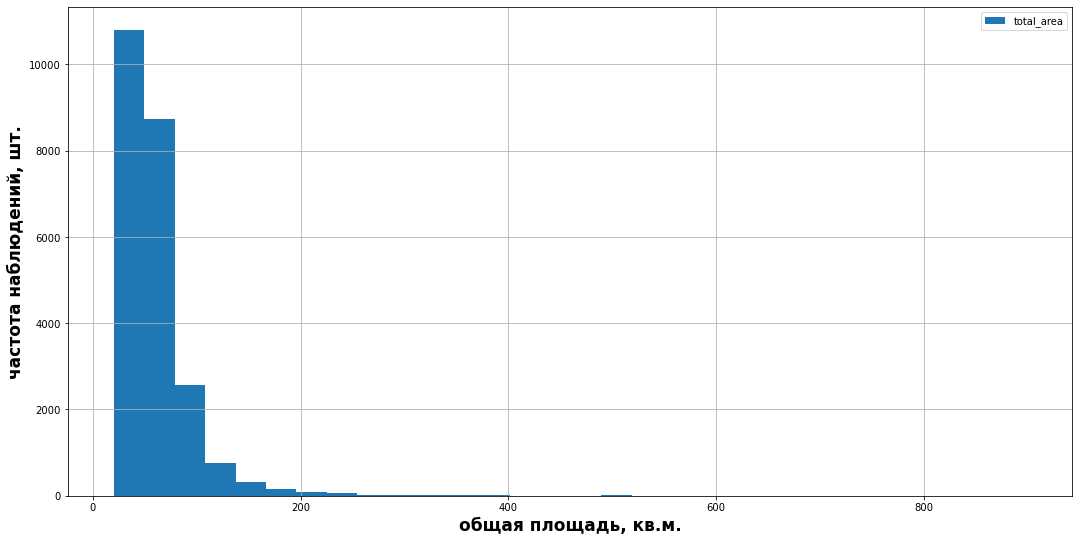

In [208]:
estate_new.plot(y='total_area', bins=30, kind='hist', legend=True, grid=True, figsize=(18,9))
plt.xlabel('общая площадь, кв.м.', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('частота наблюдений, шт.', fontsize='17', horizontalalignment='center', fontweight='bold')

Text(0, 0.5, 'общая площадь, кв.м.')

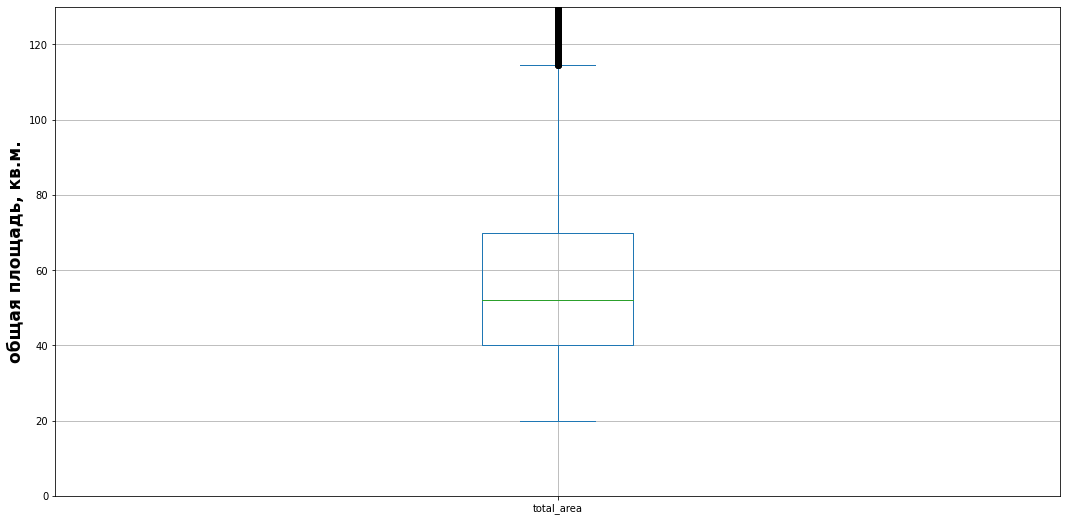

In [209]:
estate_new.plot(y='total_area', kind='box', legend=True, ylim=(0,130), grid=True, figsize=(18,9))
plt.ylabel('общая площадь, кв.м.', fontweight='bold', fontsize='17', horizontalalignment='center')


**Основные данные по площадям скоцентрированы в диапозонах 20-50,50-70 и в меньшей степени 70-115 кв.м. и коррелируют с количеством комнат в квартире.**

In [210]:
estate_new['last_price'].describe()

count        23,598.00
mean      6,550,873.60
std      10,906,356.66
min         430,000.00
25%       3,430,875.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

Text(0, 0.5, 'частота наблюдений, шт.')

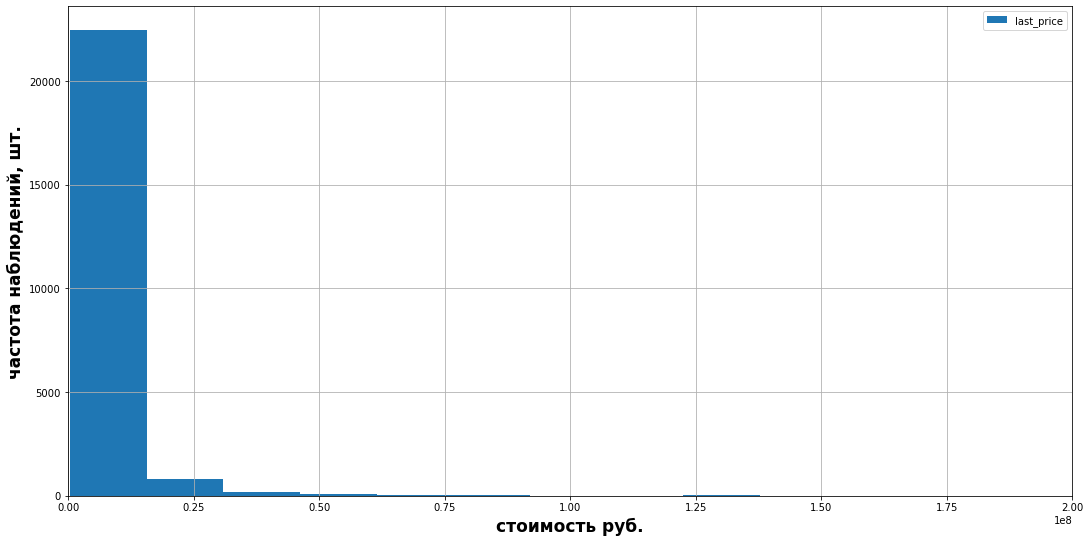

In [211]:
estate_new.plot(y='last_price', bins=50, kind='hist',xlim=(0,200000000), legend=True, grid=True, figsize=(18,9))
plt.xlabel('стоимость руб.', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('частота наблюдений, шт.', fontsize='17', horizontalalignment='center', fontweight='bold')

Text(0, 0.5, 'стоимость руб.')

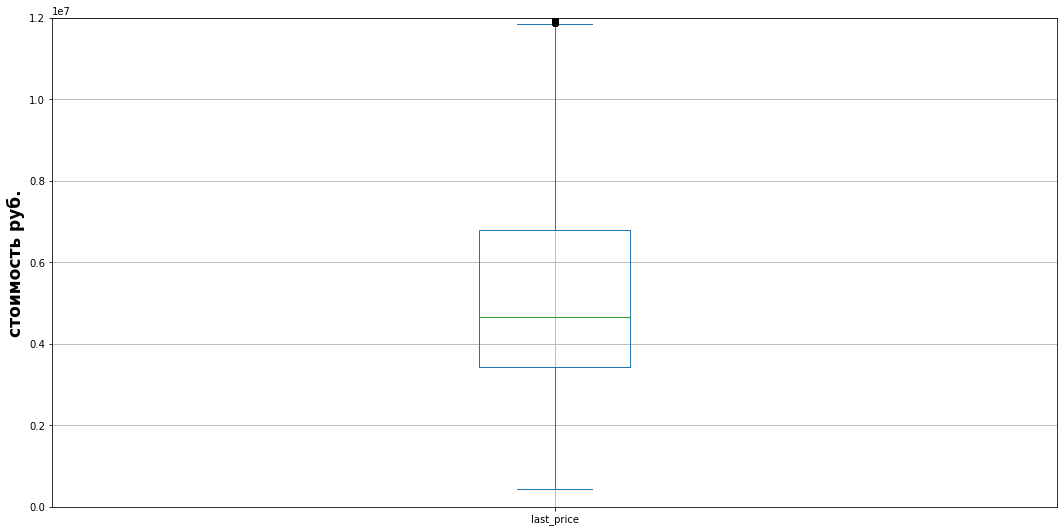

In [212]:
estate_new.plot(y='last_price', kind='box', legend=True, ylim=(0,12000000), grid=True, figsize=(18,9))
plt.ylabel('стоимость руб.', fontweight='bold', fontsize='17', horizontalalignment='center')

**от 3430000 до 6800000 рублей,вот та, сумма что вам должно хватить на покупку квартиры в Санкт-Петербурге**

In [213]:
estate_new['rooms'].describe()

count   23,598.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

Text(0, 0.5, 'частота наблюдений, шт.')

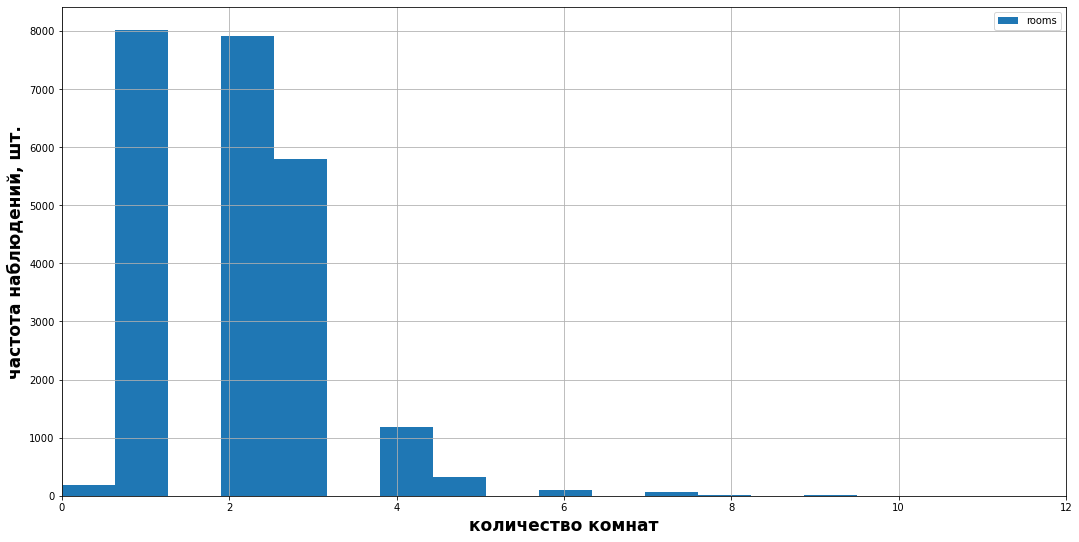

In [214]:
estate_new.plot(y='rooms', bins=30, kind='hist',xlim=(0,12), legend=True, grid=True, figsize=(18,9))
plt.xlabel('количество комнат', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('частота наблюдений, шт.', fontsize='17', horizontalalignment='center', fontweight='bold')

**Однокомнатные, двухкомнатные, трёхкомнатные,четырёхкомнатные остальное экзотика.**

In [215]:
estate_new['ceiling_height'].describe()

count   23,598.00
mean         2.70
std          0.22
min          2.40
25%          2.60
50%          2.65
75%          2.70
max          4.20
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'частота наблюдений, шт.')

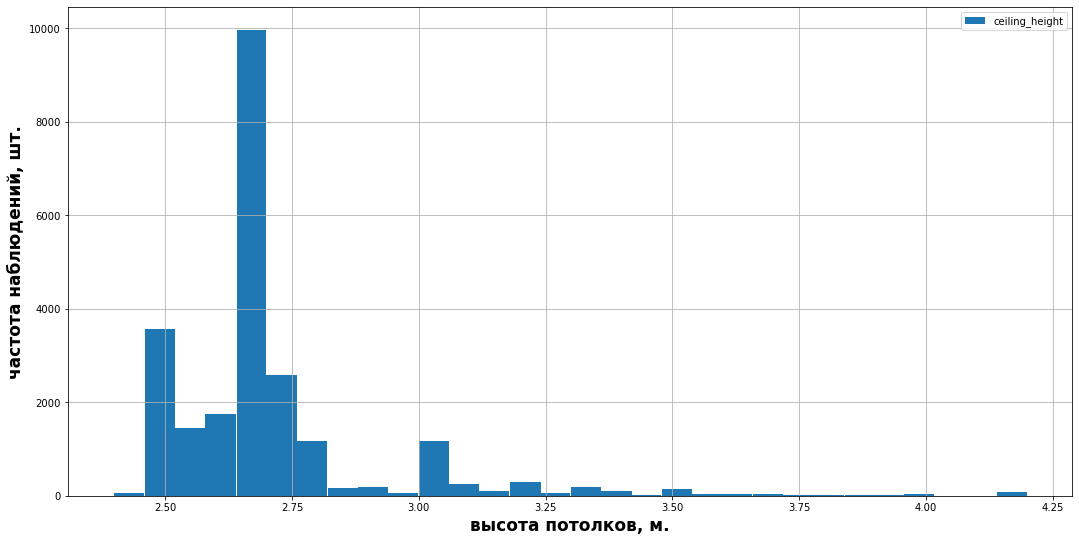

In [216]:
estate_new.plot(y='ceiling_height', bins=30, kind='hist', legend=True, grid=True, figsize=(18,9))
plt.xlabel('высота потолков, м.', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('частота наблюдений, шт.', fontsize='17', horizontalalignment='center', fontweight='bold')

**Вывод 2.625 м. такой высоты, потолок в вашей квартире, если нет то вы большой оригинал)))**

In [217]:
estate_new['days_exposition'].describe()

count   23,598.00
mean       169.35
std        206.66
min          1.00
25%         45.00
50%         95.00
75%        198.00
max      1,580.00
Name: days_exposition, dtype: float64

Text(0, 0.5, 'частота наблюдений, шт.')

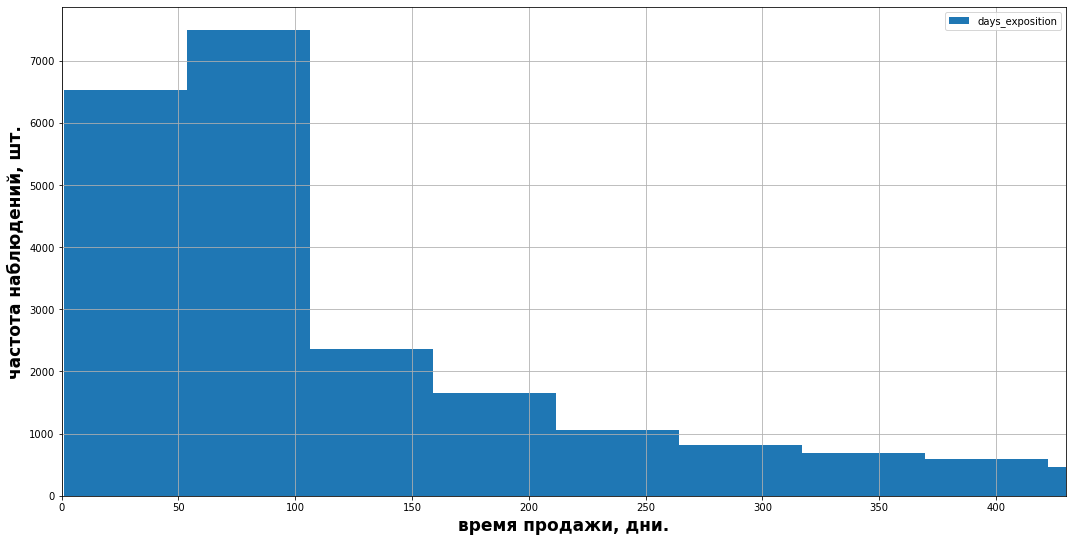

In [218]:
estate_new.plot(y='days_exposition', bins=30, kind='hist', xlim=(0,430), legend=True, grid=True, figsize=(18,9))
plt.xlabel('время продажи, дни.', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('частота наблюдений, шт.', fontsize='17', horizontalalignment='center', fontweight='bold')

Text(0, 0.5, 'время продажи, дни')

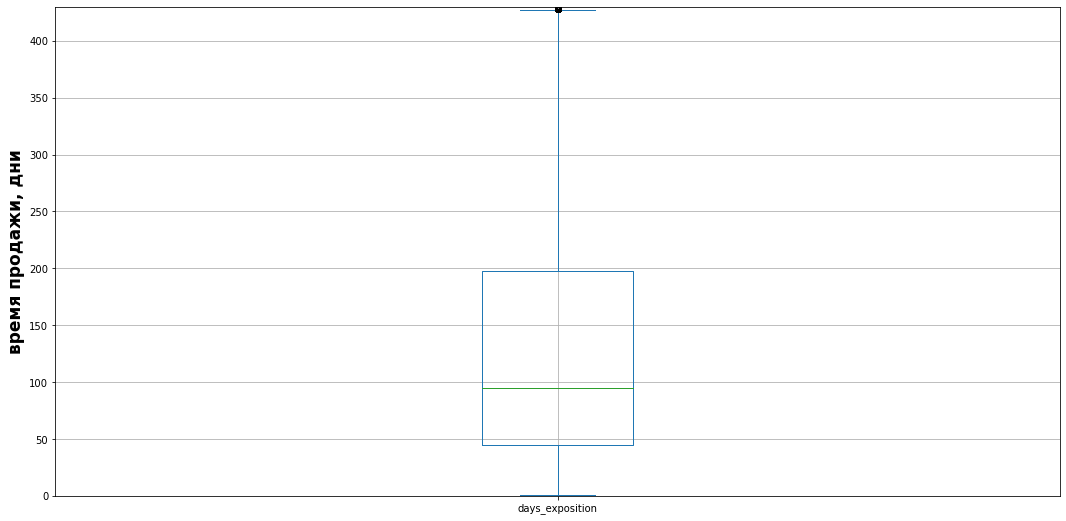

In [219]:
estate_new.plot(y='days_exposition', kind='box', legend=True, ylim=(0,430), grid=True, figsize=(18,9))
plt.ylabel('время продажи, дни', fontweight='bold', fontsize='17', horizontalalignment='center')

#### Вывод
* **обычно продажа занимает 55-110 дней**
* **можно считать, что время продажи необычайно быстро, если оно меньше 45 дней**
* **можно считать, что время продажи необычайно долго, если оно больше 198 дней, и совсем всё плохо если оно больше 400 дней**

### Изучим факторы влияющие на стоимость квартиры

### Построим зависимотсь цены от площади.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

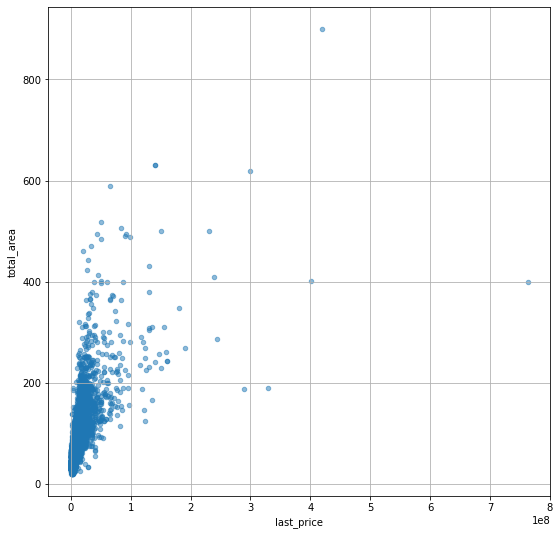

In [220]:
estate_new.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5, figsize=(9,9), grid=True)

In [221]:
estate_new['last_price'].corr(estate_new['total_area'])

0.6539803251983931

#### Вывод
**Зависимоть между ценой и общей площадью ярко выраженная.**

### Построим зависимотсь между числом комнат и ценой

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

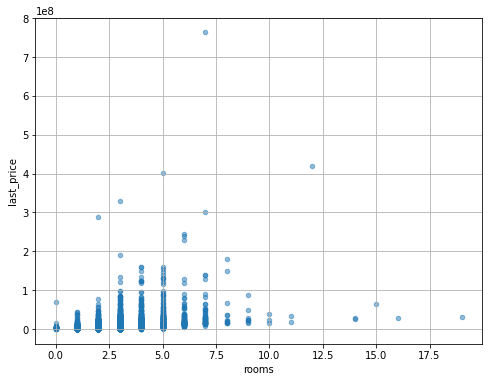

In [222]:
estate_new.plot(x='rooms', y='last_price', kind='scatter', figsize=(8, 6),grid=True, alpha=0.5)

In [223]:
estate_new['last_price'].corr(estate_new['rooms'])

0.36340233742925004

#### Вывод 
**Рост цены наблюдается до трёхкомнатых квартир, далее увеличение количества комнат не ведёт к такой прямой связи, что подтверждает и низкий коффициент корреляции.**

### Посмотрим зависимоть между ценой и этажем.


<AxesSubplot:xlabel='floor_is', ylabel='last_price'>

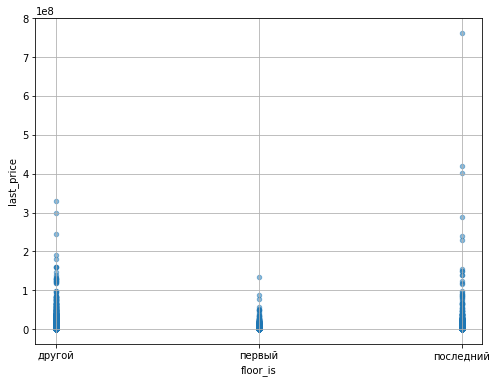

In [224]:
estate_new.plot(x='floor_is', y='last_price', kind='scatter', alpha=0.5, figsize=(8, 6),grid=True)

#### Вывод
**'Не первый и не последний' такие слова риэлторы слашат часто, но на цену влияет первый, последний в пределах разумного.**



### Построим зависимость цены от удаленности от центра



<AxesSubplot:xlabel='city_center_nearest', ylabel='last_price'>

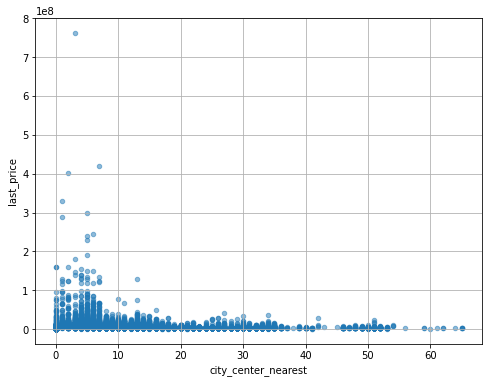

In [225]:
estate_new.plot(x='city_center_nearest', y='last_price', kind='scatter',figsize=(8, 6),grid=True, alpha=0.5) 

#### Вывод
**Видим три пика самый центр где встречаются крайнии значения, рядом с центром но цена в три раза ниже , третье кольцо но цены уже не в разы меньше, и плавный спад на окраинах.**

### Изучим зависимоть от дня недели, месяца и года.

<AxesSubplot:xlabel='last_price', ylabel='week_day'>

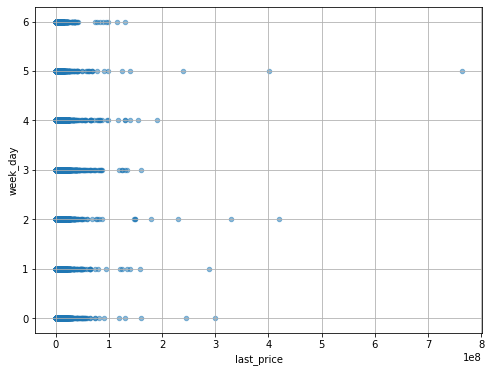

In [226]:
estate_new.plot(x='last_price', y='week_day', kind='scatter',figsize=(8, 6),grid=True, alpha=0.5)

<AxesSubplot:xlabel='last_price', ylabel='month'>

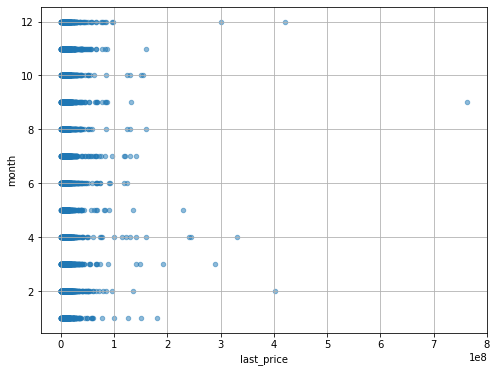

In [227]:
estate_new.plot(x='last_price', y='month', kind='scatter',figsize=(8, 6),grid=True, alpha=0.5)

<AxesSubplot:xlabel='last_price', ylabel='year'>

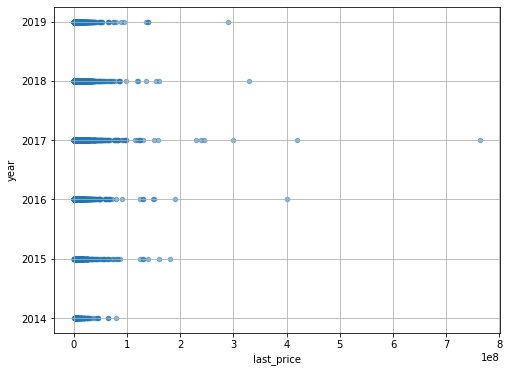

In [228]:
estate_new.plot(x='last_price', y='year', kind='scatter',figsize=(8, 6),grid=True, alpha=0.5)

#### Вывод
* **Уровень предложения влияет на цену в следующем году, нехватка предложения в 2014,2016 м привела к роcту цен в 2015,2017, как избыток в 2017м к просадке по цене в 2018.**
* **B воскресенье августа 2014 го года был самый лучший момент для покупки недвижимости, а в четверг декабря 2017 лучше было не покупать:)**

### Найдём минимальную и максимальную стоимость кв.м. в городах с наибольшим количеством объявлений.

**Cписок городв**

In [229]:
estate_new['locality_name'].value_counts().head(10).index.tolist() 

['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'посёлок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [230]:
top = estate_new['locality_name'].isin(['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'посёлок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг'])

 **Cгрупируем и отсортируем**

In [231]:
table = estate_new[top].pivot_table(
        values='sqr_price', 
        index=['locality_name'],
    ).sort_values(by='sqr_price', ascending=False)

In [232]:
print(table)

                   sqr_price
locality_name               
Санкт-Петербург   114,832.80
Пушкин            103,081.92
деревня Кудрово    92,471.85
посёлок Парголово  90,176.05
посёлок Мурино     85,752.74
посёлок Шушары     78,654.53
Колпино            75,424.09
Гатчина            68,745.83
Всеволожск         68,652.85
Выборг             58,140.89


**Выведем сводную таблицу со стоимостью квадратного метра и количеством объявлений в ТОП-10 населенных пунктов**

In [233]:
frame = estate_new['locality_name'].value_counts().head(10).to_frame()

In [234]:
table.join(frame)

,sqr_price,locality_name
locality_name,,
Санкт-Петербург,"114,832.80",15700
Пушкин,"103,081.92",368
деревня Кудрово,"92,471.85",299
посёлок Парголово,"90,176.05",327
посёлок Мурино,"85,752.74",522
посёлок Шушары,"78,654.53",439
Колпино,"75,424.09",338
Гатчина,"68,745.83",307
Всеволожск,"68,652.85",398


#### Вывод
**В топ 10 городах минимальная стоимость квадратного метра в Выборге 58142 рублей, максимальная в Санкт-Петербурге 114833 рублей, по уровню цен в первой пятёрке можно предположить, что это ближайший пригород**

### Найдём денежный центр Санкт-Петербурга.

Text(0, 0.5, 'стоимость, руб.')

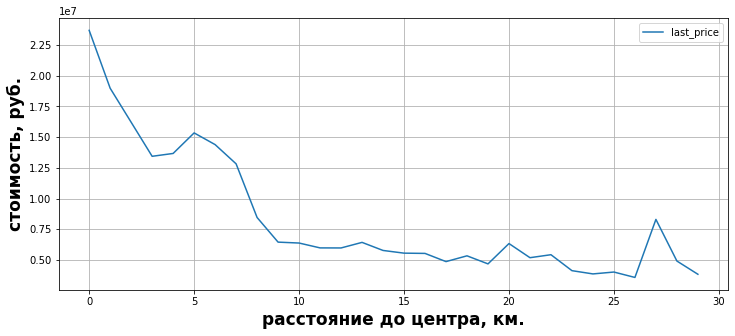

In [235]:
(
    estate_new.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_center_nearest', values='last_price')
    .plot(grid=True, figsize=(12, 5))
)
plt.xlabel('расстояние до центра, км.', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('стоимость, руб.', fontsize='17', horizontalalignment='center', fontweight='bold')

#### Вывод
**Радиус 2,5 км это денежный центр.**

### Анализ квартир в центре

In [236]:
estate_center = estate_new.query('city_center_nearest < 2.5')

In [237]:
estate_center['total_area'].describe()

count   6,054.00
mean         inf
std          inf
min        20.00
25%        37.09
50%        48.41
75%        63.23
max       517.00
Name: total_area, dtype: float64

Text(0, 0.5, 'частота наблюдений, шт.')

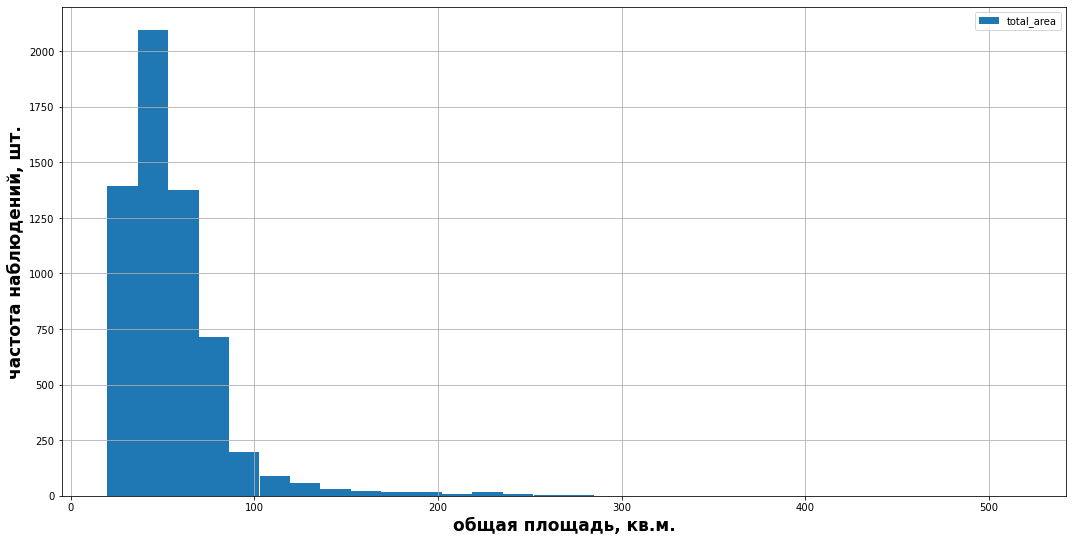

In [238]:
estate_center.plot(y='total_area', bins=30, kind='hist', legend=True, grid=True, figsize=(18,9))
plt.xlabel('общая площадь, кв.м.', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('частота наблюдений, шт.', fontsize='17', horizontalalignment='center', fontweight='bold')

Text(0, 0.5, 'площадь, кв.м.')

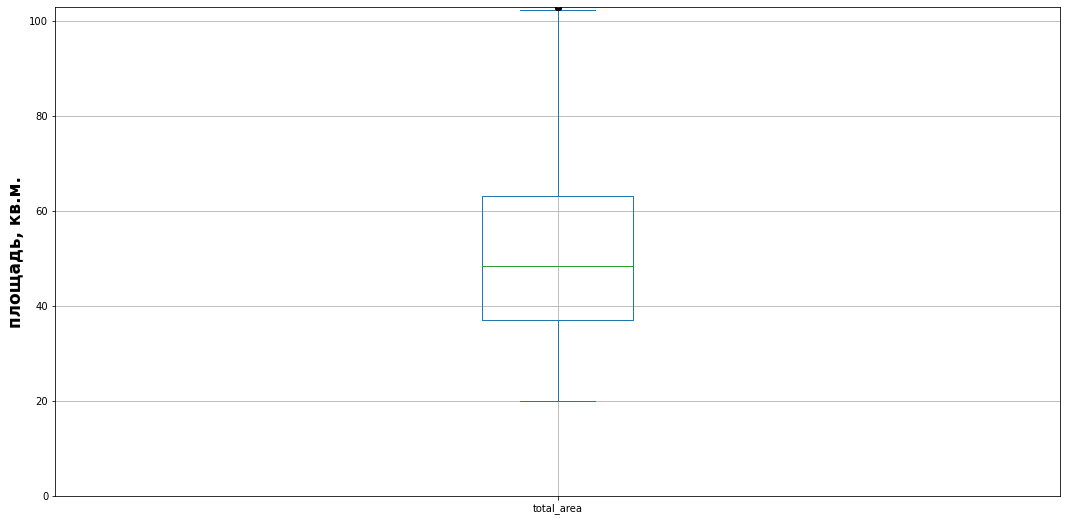

In [239]:
estate_center.plot(y='total_area', kind='box', legend=True, ylim=(0,103), grid=True, figsize=(18,9))
plt.ylabel('площадь, кв.м.', fontweight='bold', fontsize='17', horizontalalignment='center')

###### Квартиры в центре пусть на немного ,но меньше.

In [240]:
estate_center['last_price'].describe()

count         6,054.00
mean      4,592,103.56
std      10,940,072.57
min         430,000.00
25%       2,100,000.00
50%       2,980,000.00
75%       4,200,000.00
max     401,300,000.00
Name: last_price, dtype: float64

Text(0, 0.5, 'частота наблюдений, шт.')

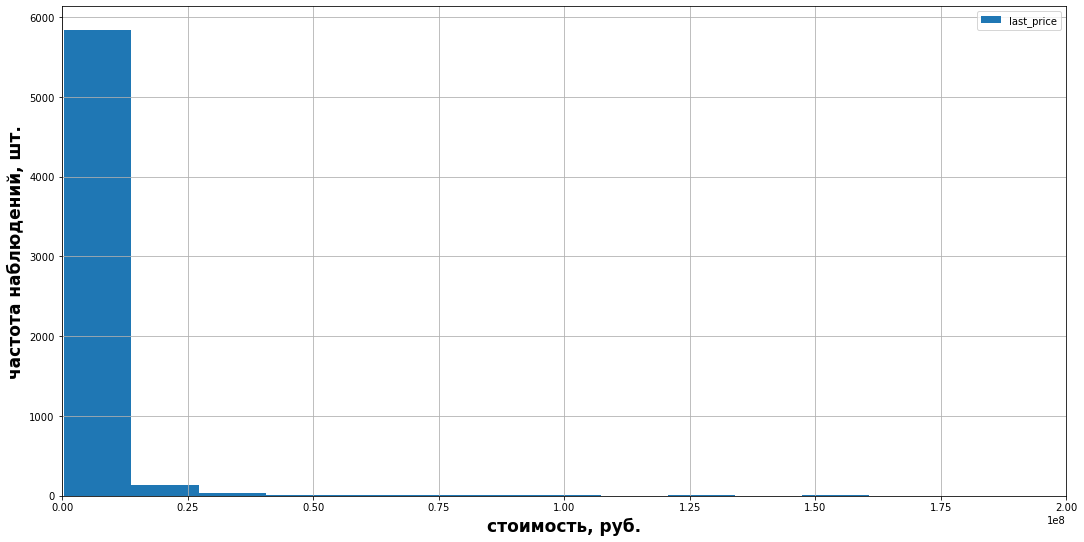

In [241]:
estate_center.plot(y='last_price', bins=30, kind='hist',xlim=(-100000,200000000), legend=True, grid=True, figsize=(18,9))
plt.xlabel('стоимость, руб.', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('частота наблюдений, шт.', fontsize='17', horizontalalignment='center', fontweight='bold')

Text(0, 0.5, 'стоимость, руб')

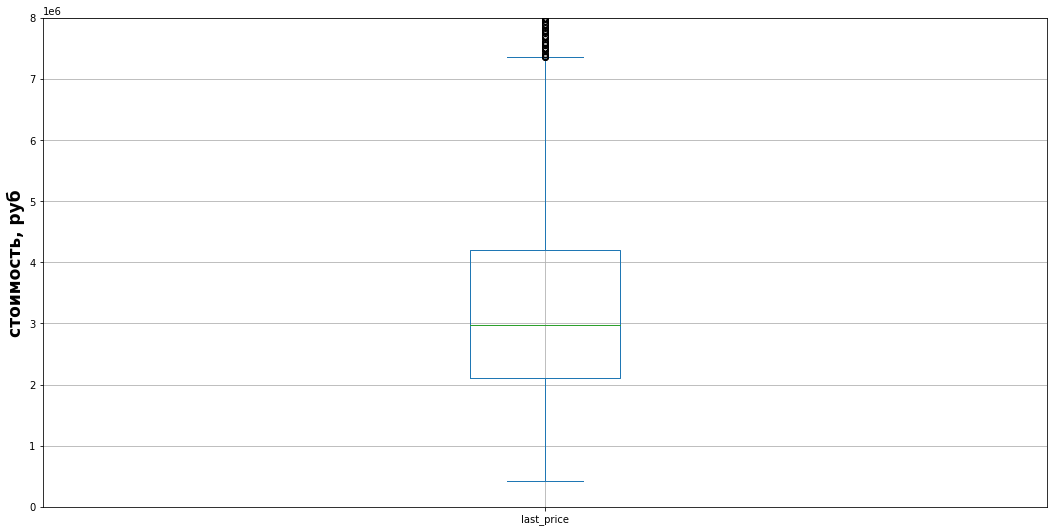

In [242]:
estate_center.plot(y='last_price', kind='box', legend=True, ylim=(0,8000000), grid=True, figsize=(18,9))
plt.ylabel('стоимость, руб', fontweight='bold', fontsize='17', horizontalalignment='center')

###### И самое интересное дешевле.

In [243]:
estate_center['rooms'].describe()

count   6,054.00
mean        1.98
std         1.04
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        14.00
Name: rooms, dtype: float64

Text(0, 0.5, 'частота наблюдений, шт.')

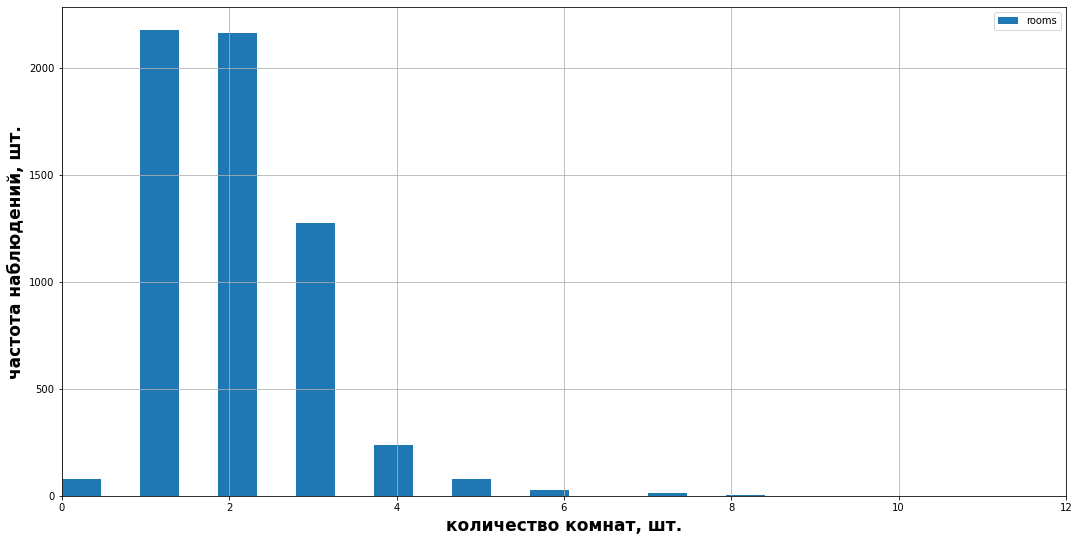

In [244]:
estate_center.plot(y='rooms', bins=30, kind='hist',xlim=(0,12), legend=True, grid=True, figsize=(18,9))
plt.xlabel('количество комнат, шт.', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('частота наблюдений, шт.', fontsize='17', horizontalalignment='center', fontweight='bold')

###### Распределение по комнатам такое-же

In [245]:
estate_center['ceiling_height'].describe()

count   6,054.00
mean        2.69
std         0.23
min         2.40
25%         2.60
50%         2.65
75%         2.65
max         4.20
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'частота наблюдений, шт.')

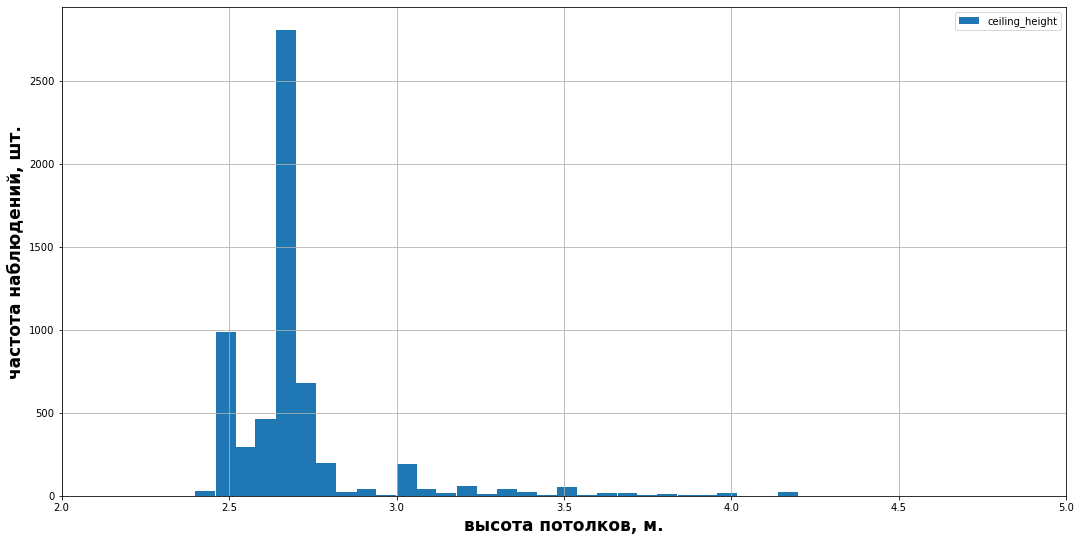

In [257]:
estate_center.plot(y='ceiling_height', bins=30, kind='hist',xlim=(2,5), legend=True, grid=True, figsize=(18,9))
plt.xlabel('высота потолков, м.', fontweight='bold', fontsize='17', horizontalalignment='center')
plt.ylabel('частота наблюдений, шт.', fontsize='17', horizontalalignment='center', fontweight='bold')

###### Потолки хоть на чуть-чуть но меньше.

### Зависимость цены от площади, числа комнат, этажа, удаленности от центра, дат размещения.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

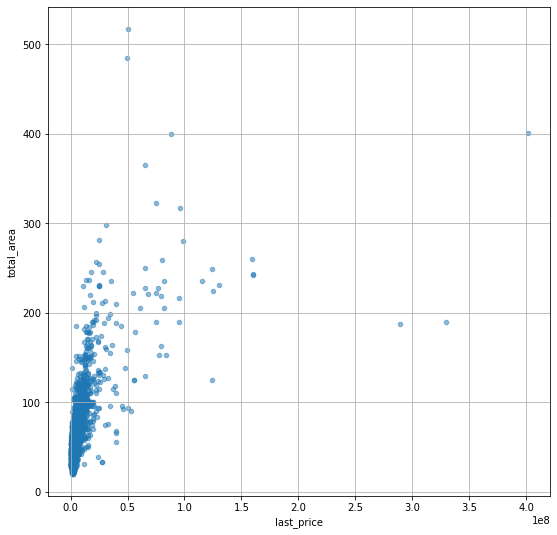

In [247]:
estate_center.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5, figsize=(9,9), grid=True)

In [248]:
estate_center['last_price'].corr(estate_center['total_area'])

0.5952179472103598

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

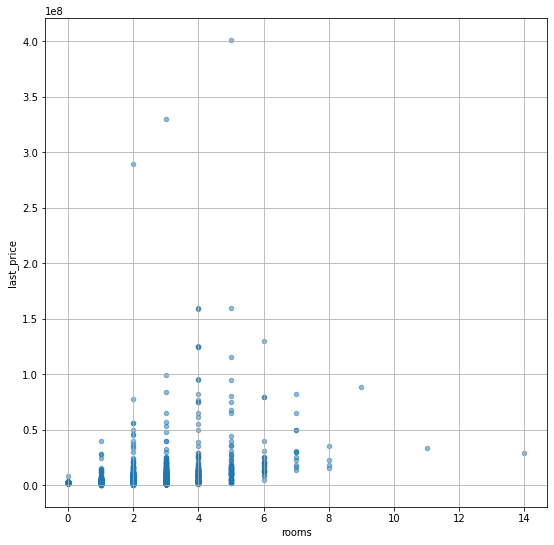

In [249]:
estate_center.plot(x='rooms', y='last_price', kind='scatter', alpha=0.5, figsize=(9,9), grid=True)

In [250]:
estate_center['last_price'].corr(estate_center['rooms'])

0.2993119964269754

<AxesSubplot:xlabel='floor_is', ylabel='last_price'>

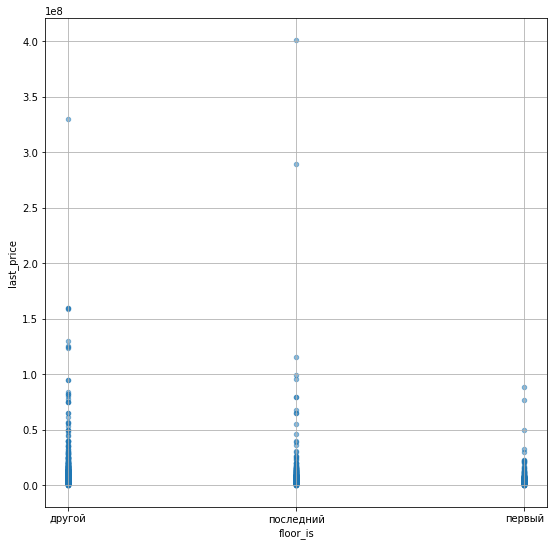

In [251]:
estate_center.plot(x='floor_is', y='last_price', kind='scatter', alpha=0.5, figsize=(9,9), grid=True)

<AxesSubplot:xlabel='city_center_nearest', ylabel='last_price'>

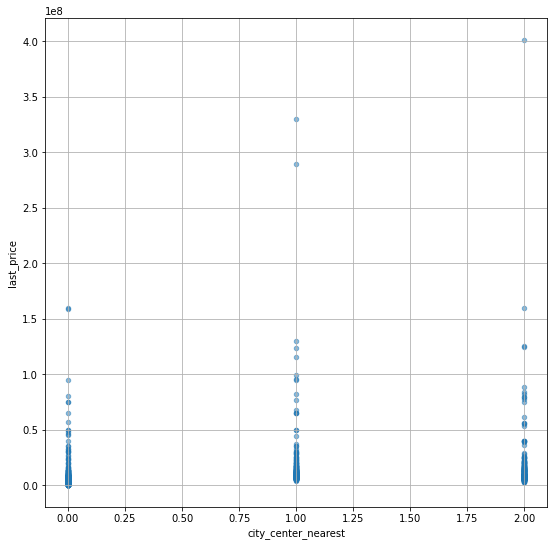

In [252]:
estate_center.plot(x='city_center_nearest', y='last_price', kind='scatter', alpha=0.5, figsize=(9,9), grid=True)

<AxesSubplot:xlabel='last_price', ylabel='week_day'>

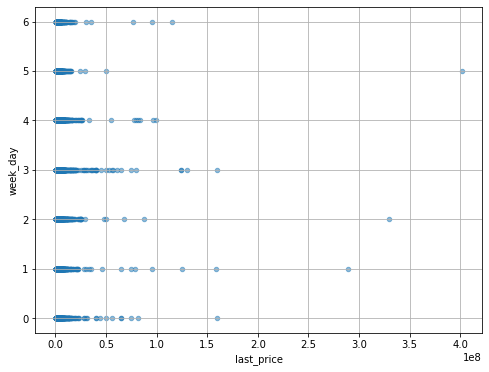

In [253]:
estate_center.plot(x='last_price', y='week_day', kind='scatter',figsize=(8, 6),grid=True, alpha=0.5)

<AxesSubplot:xlabel='last_price', ylabel='month'>

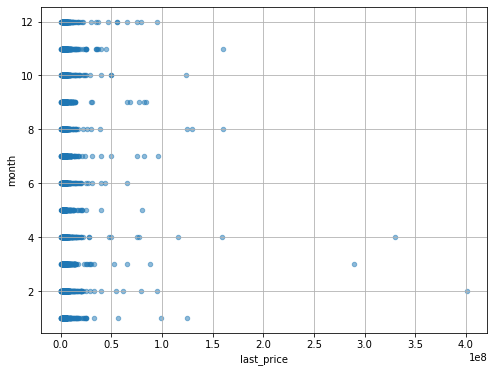

In [254]:
estate_center.plot(x='last_price', y='month', kind='scatter',figsize=(8, 6),grid=True, alpha=0.5)

<AxesSubplot:xlabel='last_price', ylabel='year'>

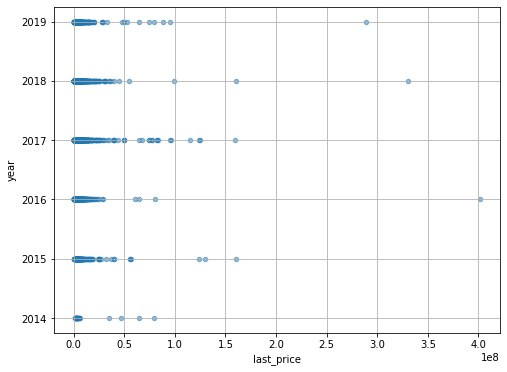

In [255]:
estate_center.plot(x='last_price', y='year', kind='scatter',figsize=(8, 6),grid=True, alpha=0.5)

#### Вывод
**Отсутствует зависимоть от расстояния до центра, более ярко выражен день размещения среда как самый дорогой а в остальном все также как и в квартирах что не в центре.**

## Общий вывод

**Исследования рынка недвижимости Санкт-Петербурга**

**Изучив сырые данные пришёл к следующим выводам**
*  **'last_price'** лишняя точность - привести к int. Проверили крайние значения, поправить строку 8793,предположим что            упустили    три    ноля в цене. Остальные на границе с финляндией цена адекватна оставляем (учтём в дальнейшем).
*  **'total_area'** минимальные площади характерны для комнат а не для квартир, это отдельный рынок он не является предметом      нашего исследования удалим все объекты площадью меньше 20 метров(минимальный размер студии) и почти максимальный для            комнаты. Остальные значения хоть и смогут повляиять на среднее, оставим и изучим в дальнейшем.
*  **'first_day_exposition'** привести к временному формату
*  **'cieiling_height'** много пропусков заполним медианным значением, но сначала крайнии значения приведем к                      одному.Минимальные к 2.4 т.к. это минимальная высота потолков по СНИПАМ с учетом отделки, максимальные приведём к 4.2 м. ,      выше встречается, но это исключение которым можно принебречь.По пропускам обратить внимание etl инженеров.Эти данные есть
   их можно найти и вставить даже если пользователи не знают их, либо проблема в выгрузке.
*  **'floors_total'** излишняя точность, заменить на int. Небольшая нехватка значений заменить на медианное.
   уделить внимание внесению частного сектора.
*  **'living_area'** есть объекты с жилой площадью меньше разрешенной СНИПАМИ(14 кв.м комната),есть пустые значения, более 8500    строк(очень много для выборки) с жилой площадью менее 28 кв.м. это мало вероятно т.к. стандартаная двухкомнатная это 28-30      кв.м. жилой      площади а двухкомнатные это большая доля рынка, взамосвязи не нашел, поэтому приведем в зависимость от        количества комнат        составив функцию однойй строки.
*  **'floor'** подозрительно всё в порядке)))
*  **'is_apartment'** привести к bool, значения NaN заменить на False, т.к. аппартаменты очень маленький сегмент недвижимости
   небольшое количество данных это нормально и NaN это скорей всего не апартаменты.
*  **'kitchen_area'** заменим на медианное значения в NaN и там где кухня меньше 6 метров приведм к 7, по СНИПАМ кухня 8 метров    но есть большоё количество построенного жилья с кухней 6-8 м. Максимальные значения оставим т.к. выборочная проверка            показала, что  это дорогие объекты с большой площадью, где кухня может быть больших размеров.
*  **'balcony'** Привести к bool т.к балкон либо есть, либо его нет и для наших целей количество не имеет значения.                Предположим что пропущенные значения это просто отсутствие балконов, присвоим им False.
*  **'airports_nearest'** в 85-ти пропущенных значений по целевому столбцу (Санкт-Петербург) заполним пропуски                    медианными, остальные приравняем к нулю т.к. близость аэропорта имеет смысл только для Санкт-Петербурга. Приведём к int,        округлим до киллометра. Переименовать в airport_nearest.
*  **'cityCenters_nearest'** переименуем 'city_сenter_nearest', привести к int , округлить до километра,
   в 61-ом пропущенных значений по целевому столбцу (Санкт-Петербург) заполнить пропуски медианными, остальные к нулю.

** Необходимо согласовать форму выгрузки.**

**В процессе исследования произвёл расчеты и добавил в таблицу следующие данные:**
* цену квадратного метра
* день недели, месяц и год публикации объявления
* разбивку по этажам-первый,последний,другой
* соотношение жилой площади к общей
* отношение площади кухни к общей площади

**В результате исследовательсокго анализа я ответил на следующие вопросы:**

**Установил срок продажи**

* обычно продажа занимает 55-110 дней
  можно считать, что время продажи необычайно быстро, если оно меньше 45 дней
  можно считать, что время продажи необычайно долго, если оно больше 198 дней, и совсем всё плохо если оно больше 400 дней

**Установил факторы влияющие на цену квартиры**

* площадь квартиры прямо влияет на цену
* количество комнат с увеличением их влияние снижается
* удаленность от центра тем больше влияет чем ближе квартира к центру
* располдожение квартиры на первом этаже сильно снижает цену,в то время как на последнем немногим меньше чем на других этаж
* есть зависимоть от дня недели в который размещается объявление в воскресенье самые дешевые в четверг самые дорогие
* самый лучший месяц для покупки август а самый дорогой декабрь
* разница по годам обусловлена общим изменением цен но она есть это 2014 недорого и 2017 пик цен.

**Расчитал максимальную и минимальную цену за квадратный метр в населенных пунктах с максимальным количеством объявлений:**

* Санкт_Петербург 114833 рубля за кв.м. Выборг 58142 рубля за кв.м. 

**Определил область вхождения в центр:**

* Это окружность радиусом 2,5 километра

**Выделил квартиры в центре для сравнения с остальными**

* квартиры в центре меньше, дешевле, с более низкими потолками, но не нарушают общих принципов ценообразования.


   


